In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [7]:
 dataset = pd.read_csv('processed_bondora_data.csv')

In [8]:
# --- Univariate Analysis for Numerical Features ---
numerical_features = dataset.select_dtypes(include=[np.number])

In [9]:
print("Summary Statistics for Numerical Features:\n")
print(numerical_features.describe())

Summary Statistics for Numerical Features:

         LoanNumber  BidsPortfolioManager        BidsApi    BidsManual  \
count  1.345290e+05         134529.000000  134529.000000  1.345290e+05   
mean   9.449392e+05            966.452876      29.111664  6.507063e-17   
std    4.786738e+05           1355.686016     150.159148  1.000004e+00   
min    3.700000e+01              0.000000       0.000000 -7.454212e-01   
25%    6.206790e+05            155.000000       0.000000 -6.174823e-01   
50%    9.235970e+05            465.000000       0.000000 -3.229561e-01   
75%    1.311025e+06           1218.000000       5.000000  2.261154e-01   
max    1.855339e+06          10625.000000    7570.000000  1.342116e+01   

       NewCreditCustomer  ApplicationSignedHour  ApplicationSignedWeekday  \
count      134529.000000          134529.000000             134529.000000   
mean            0.578373              13.374640                  3.907908   
std             0.493821               4.992375           

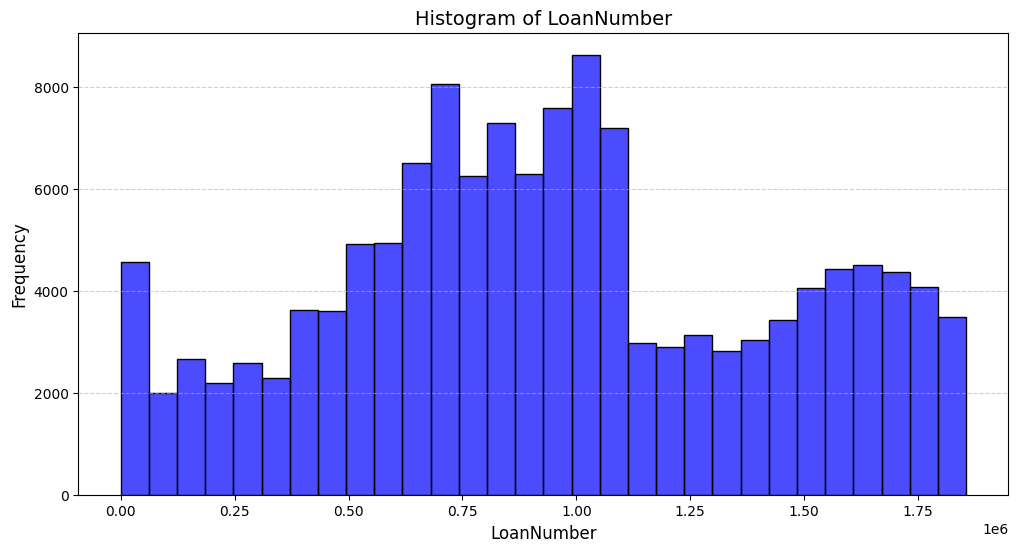

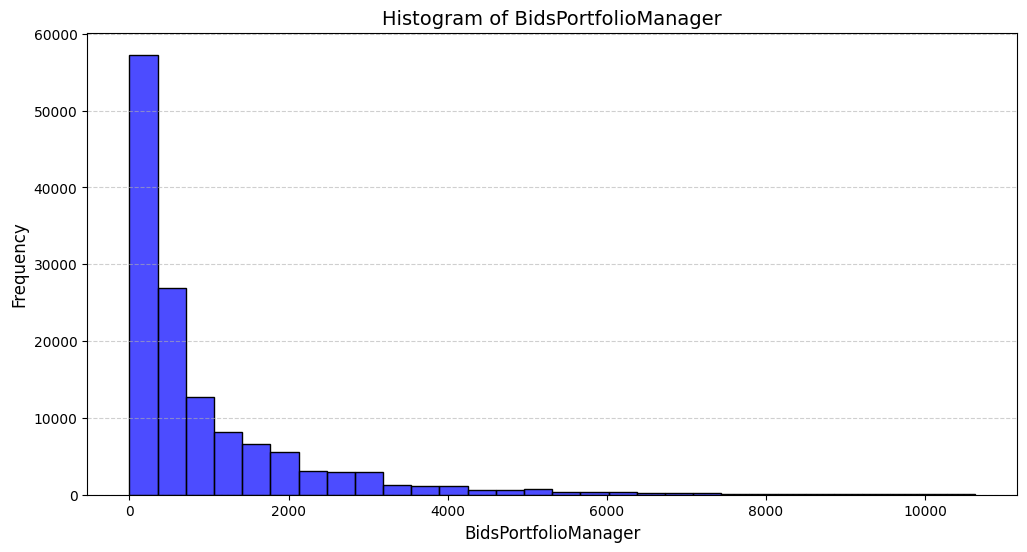

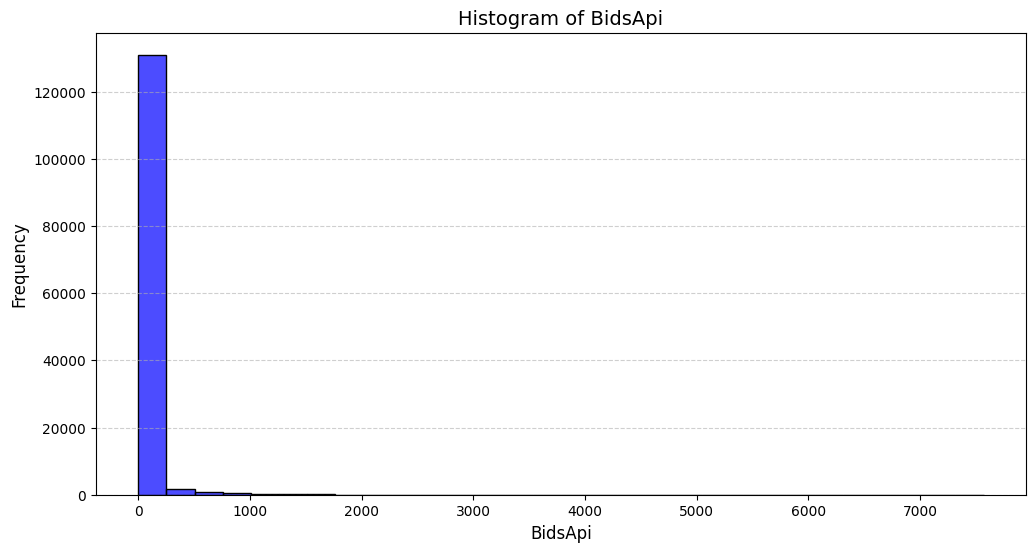

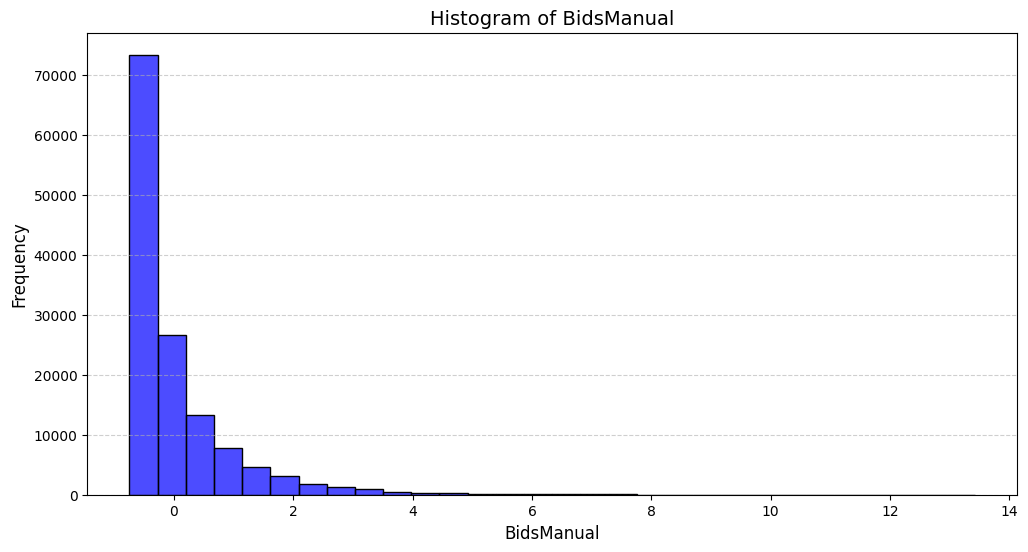

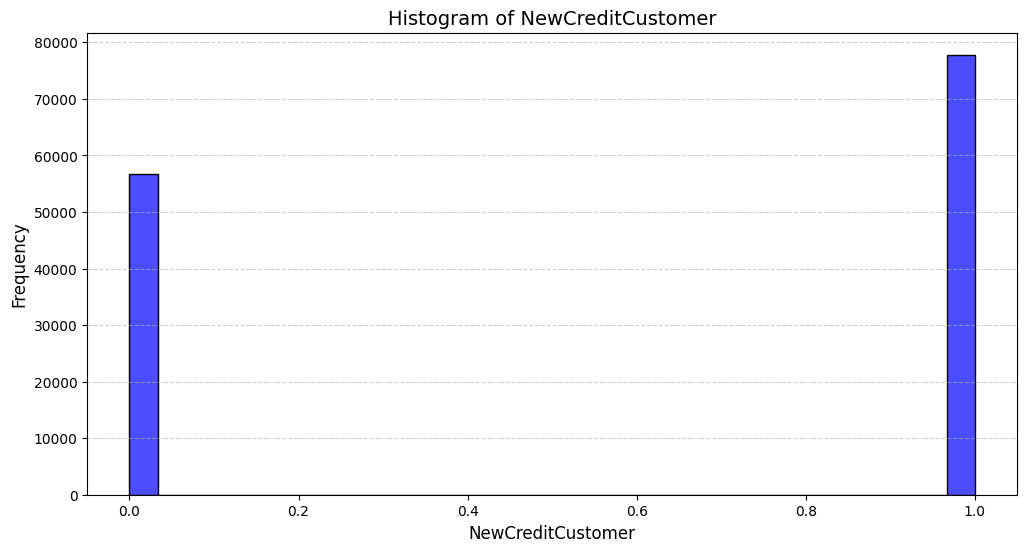

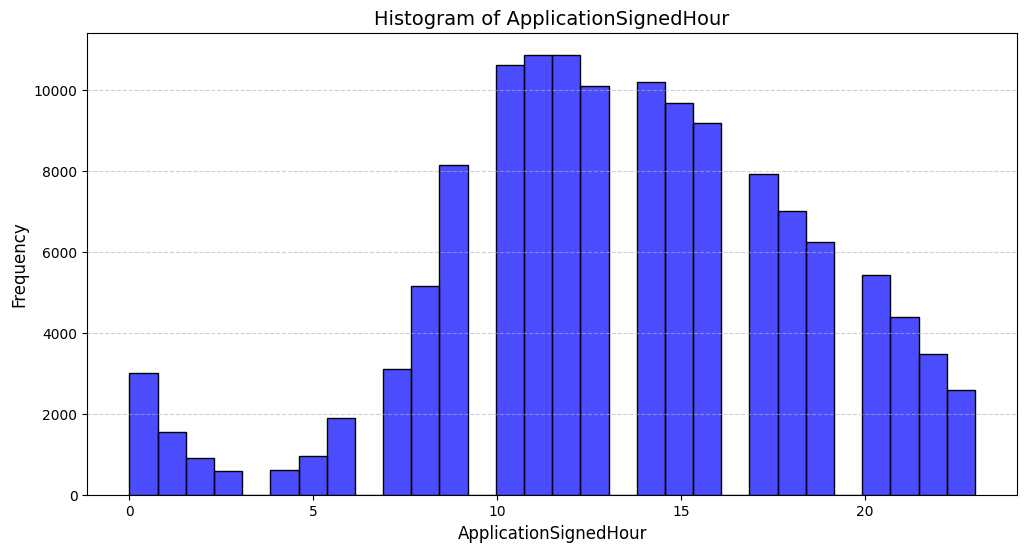

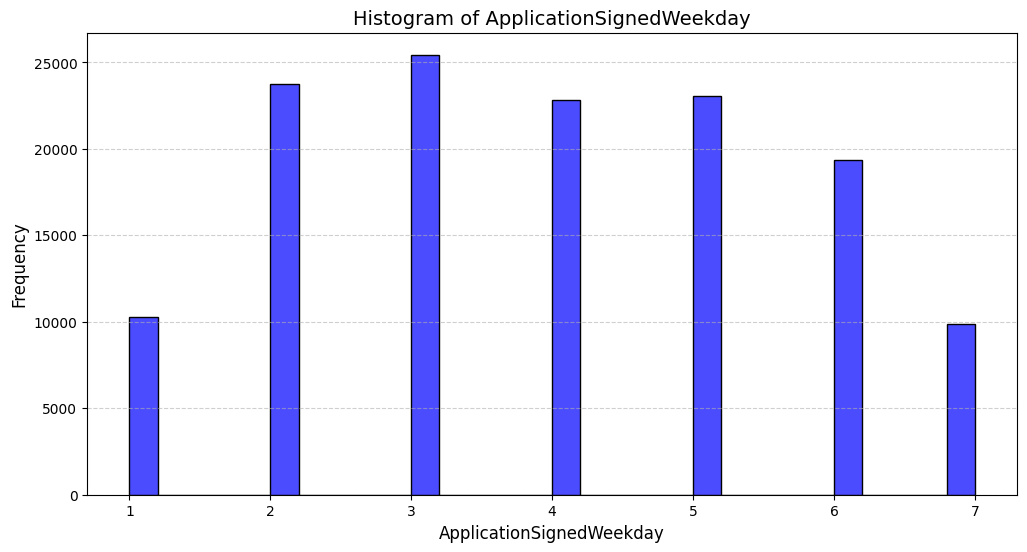

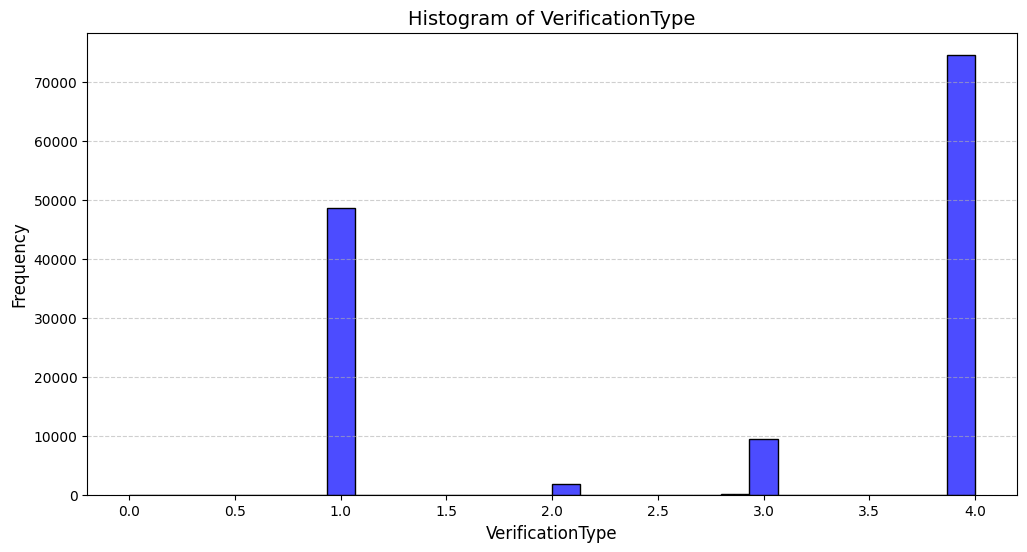

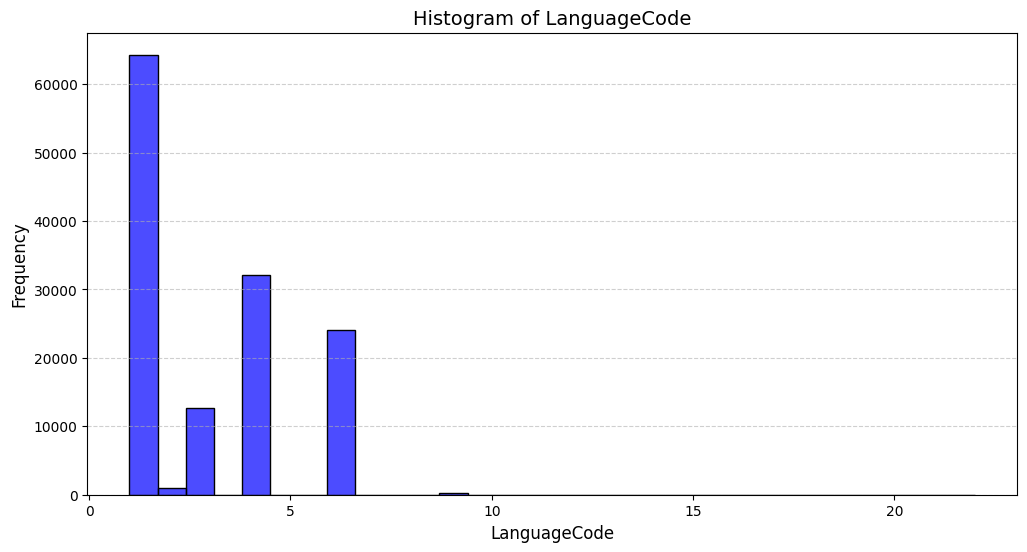

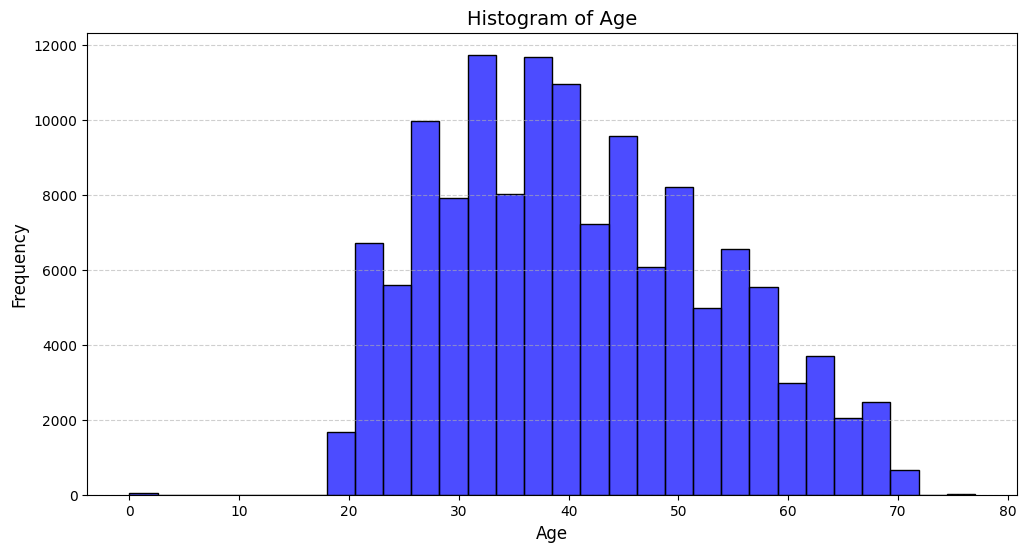

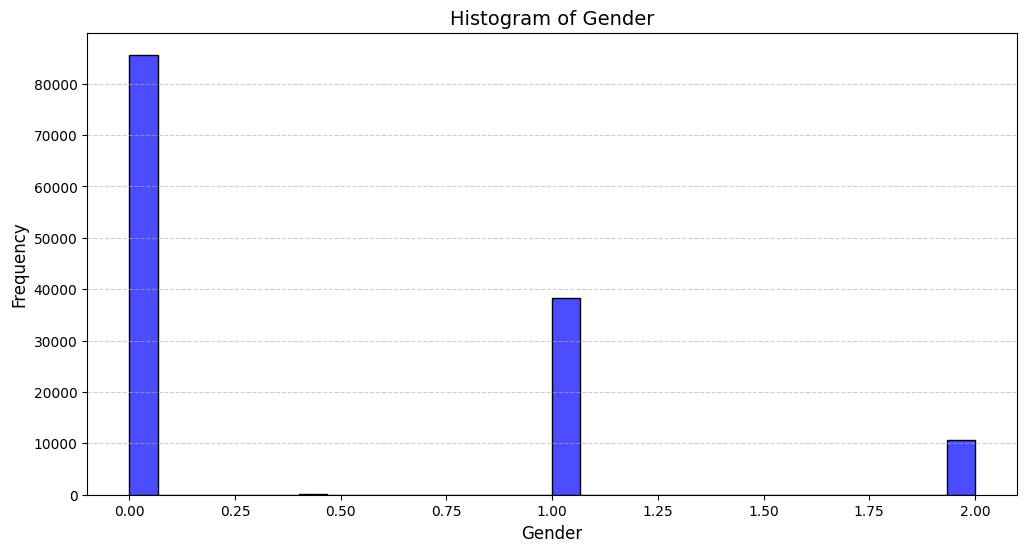

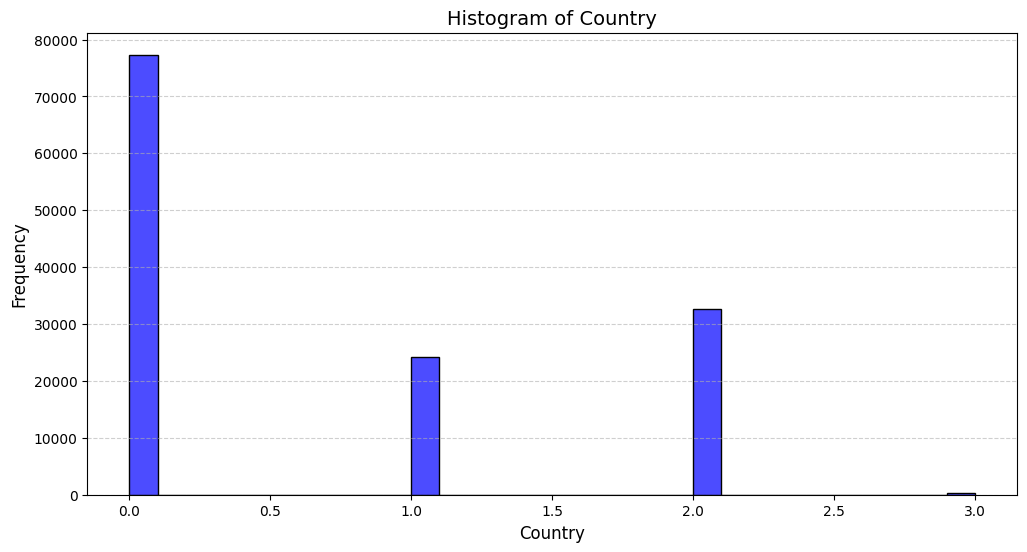

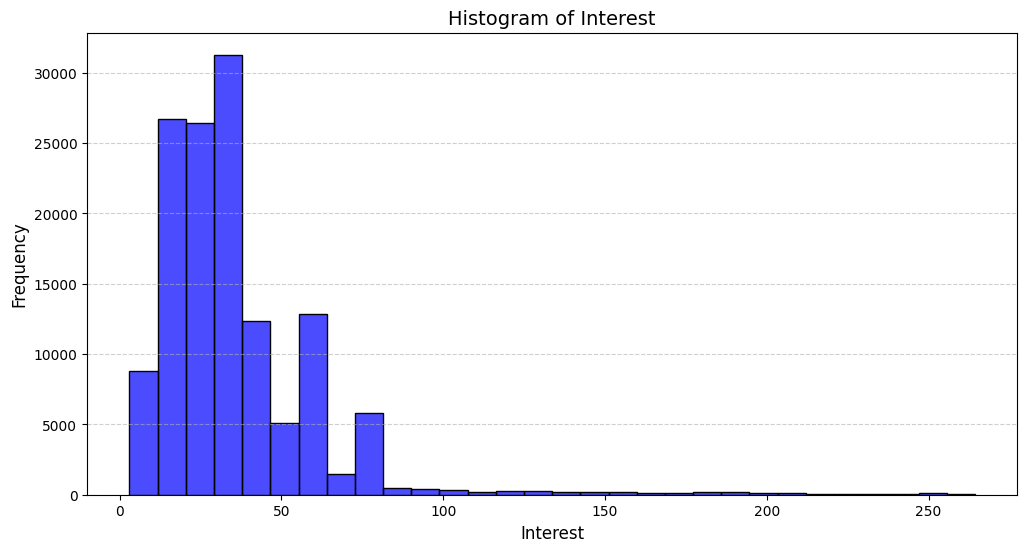

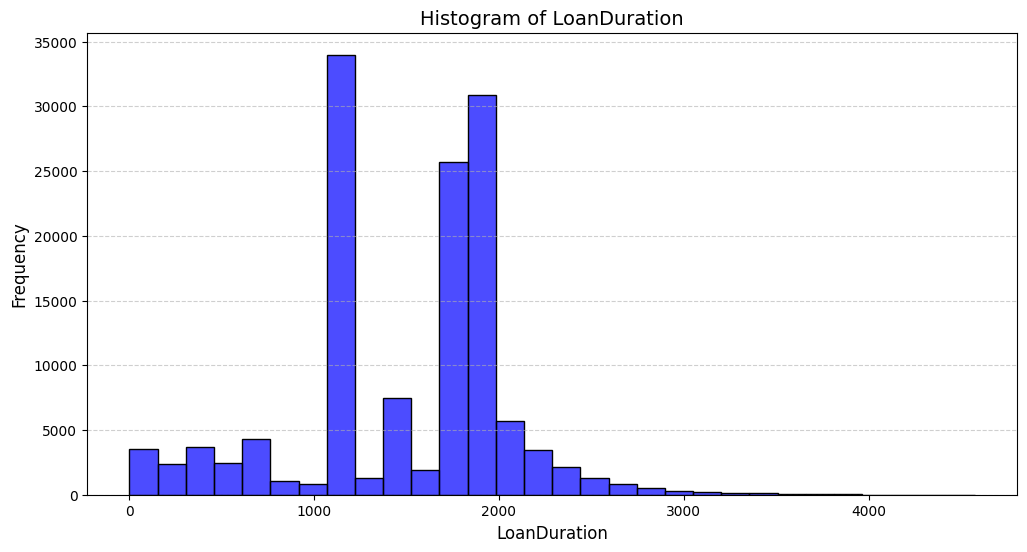

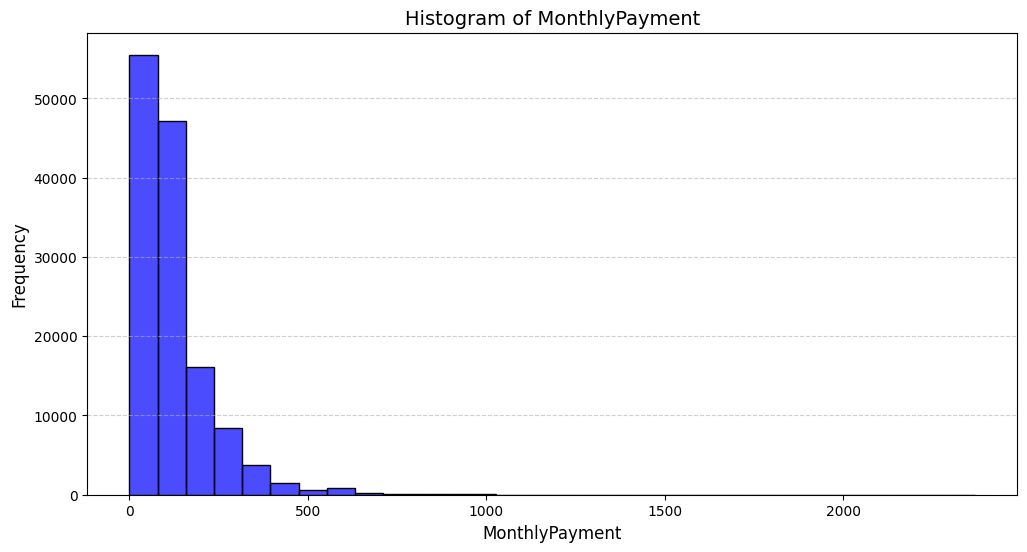

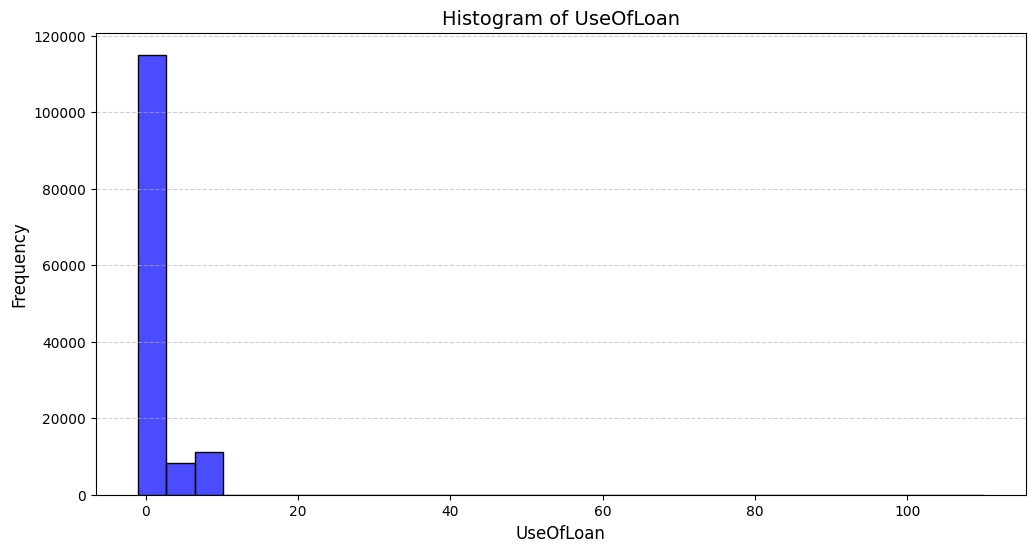

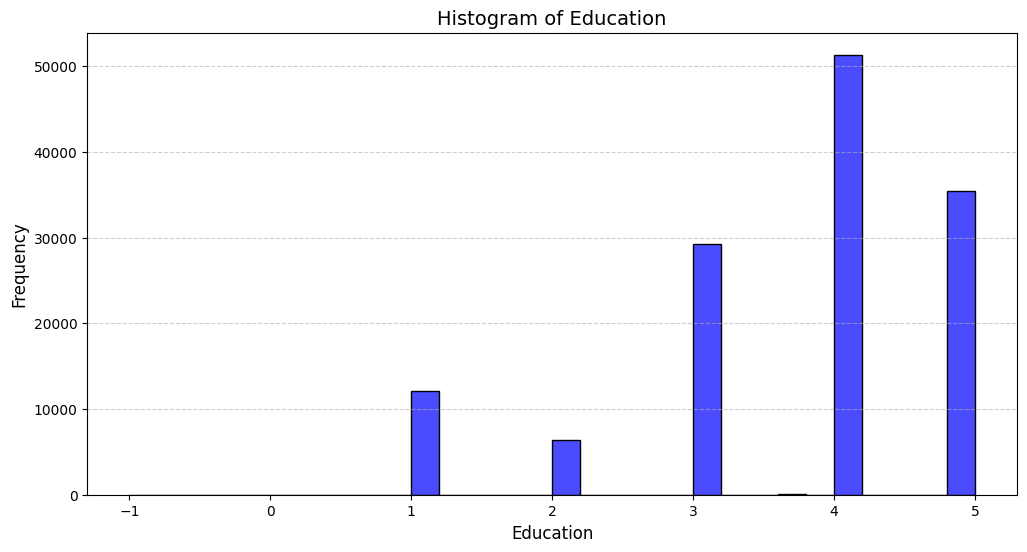

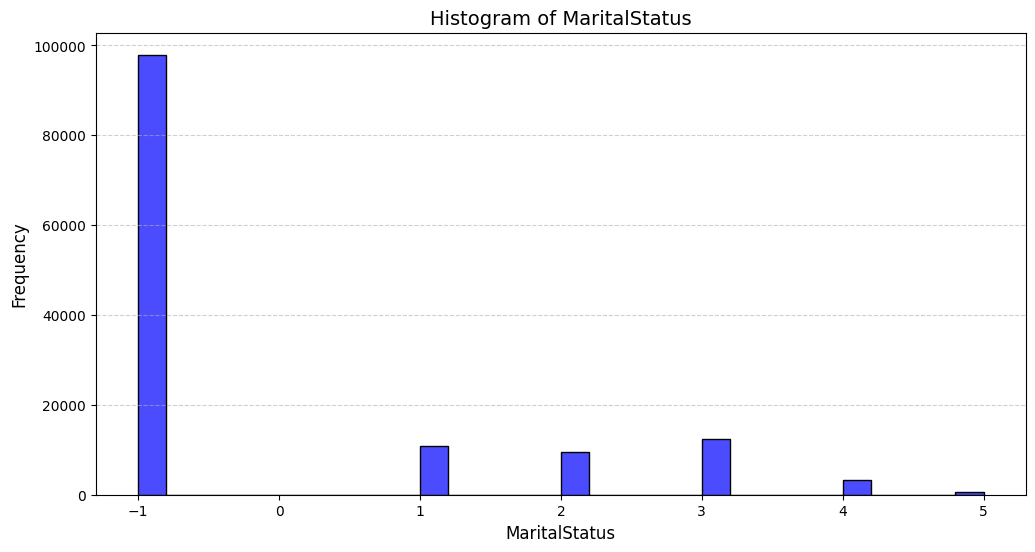

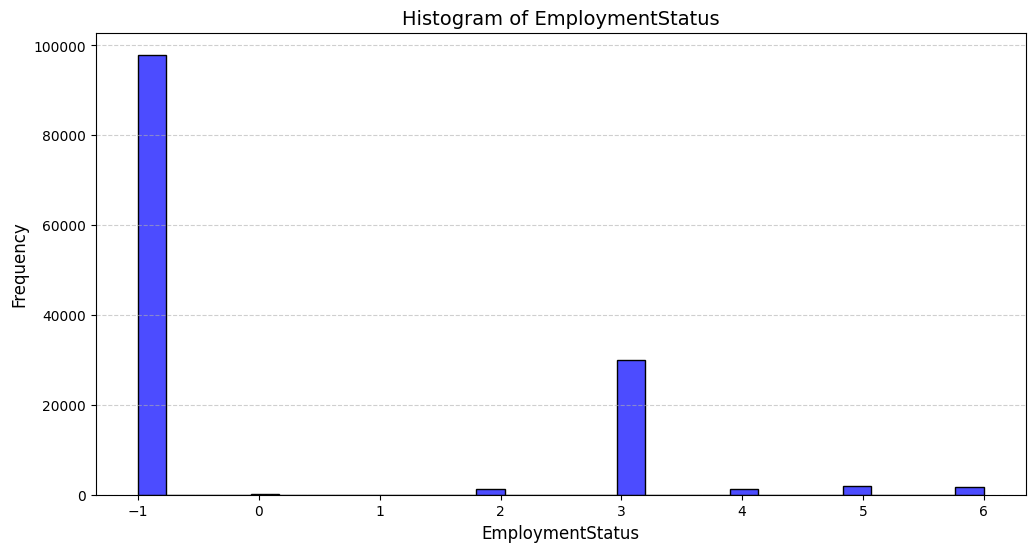

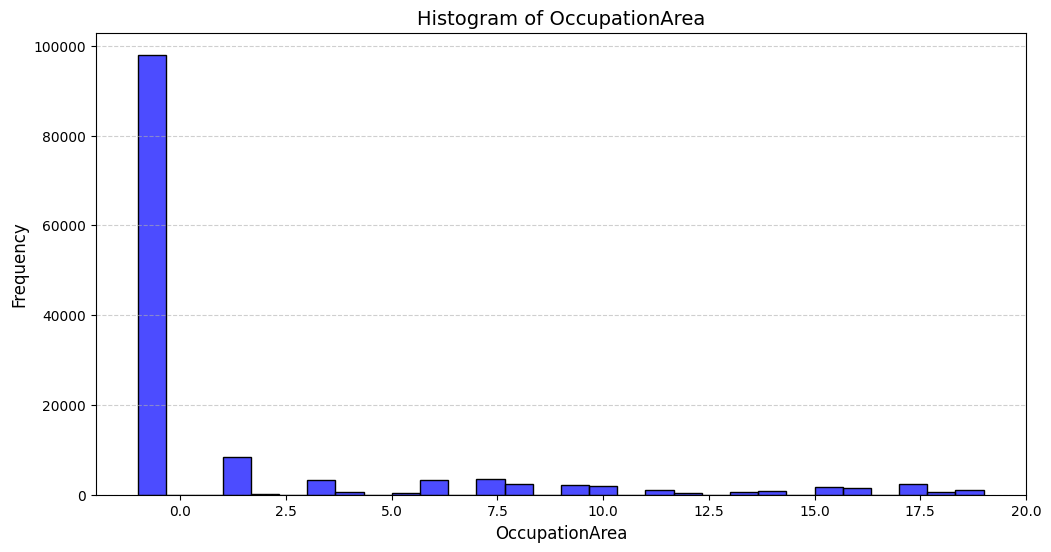

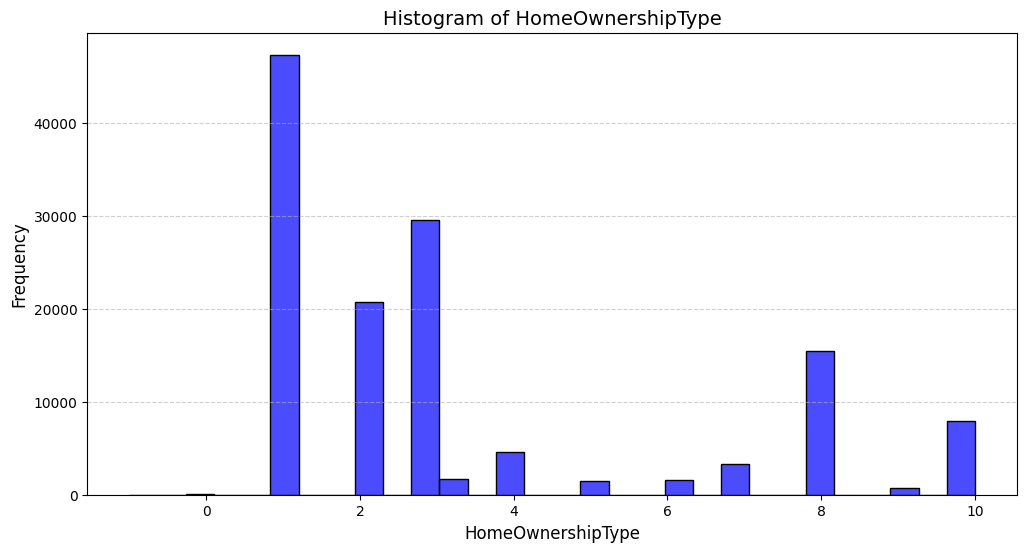

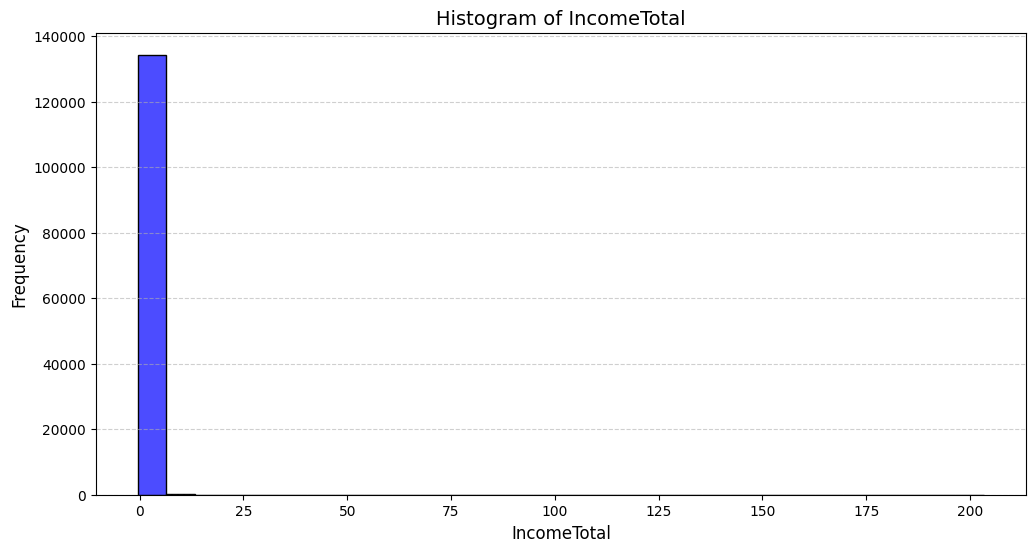

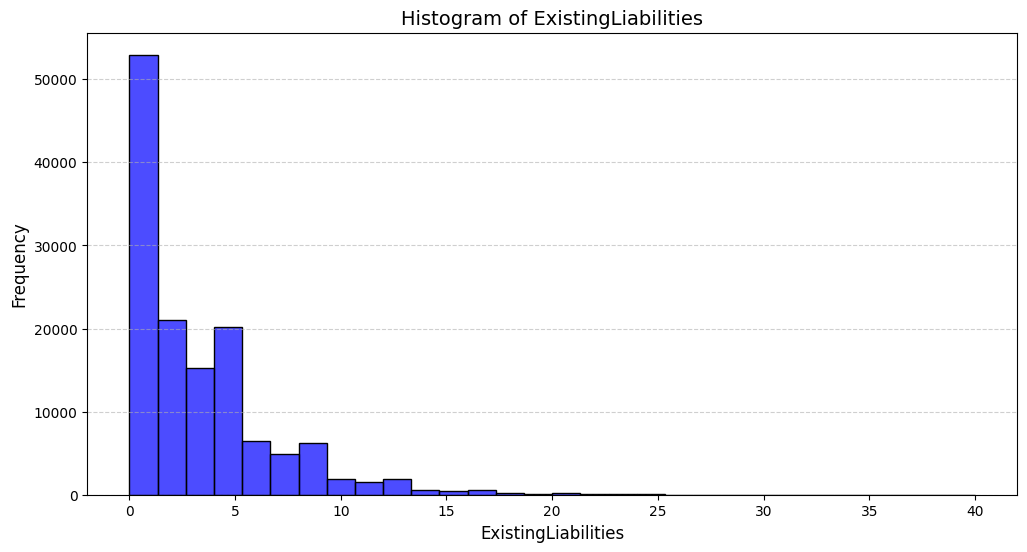

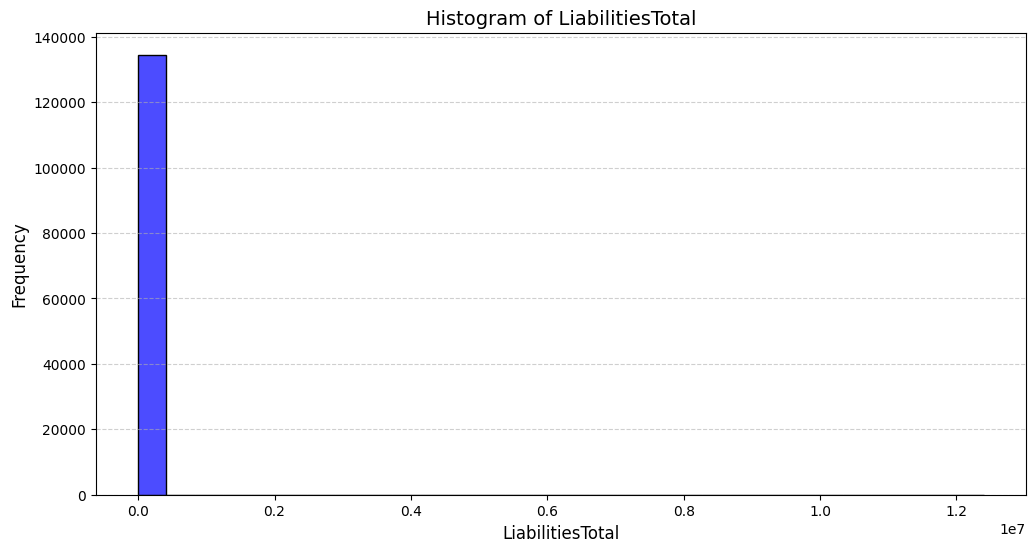

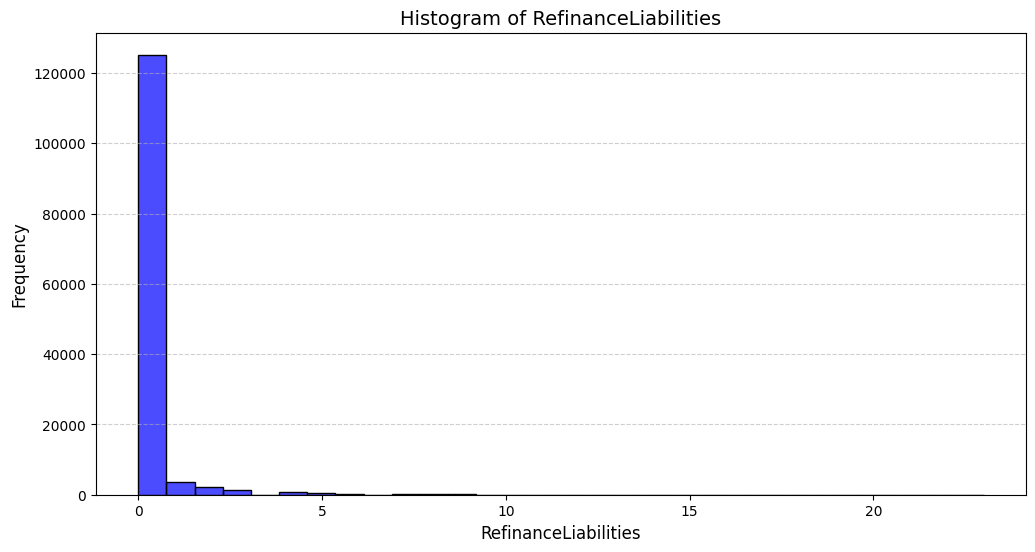

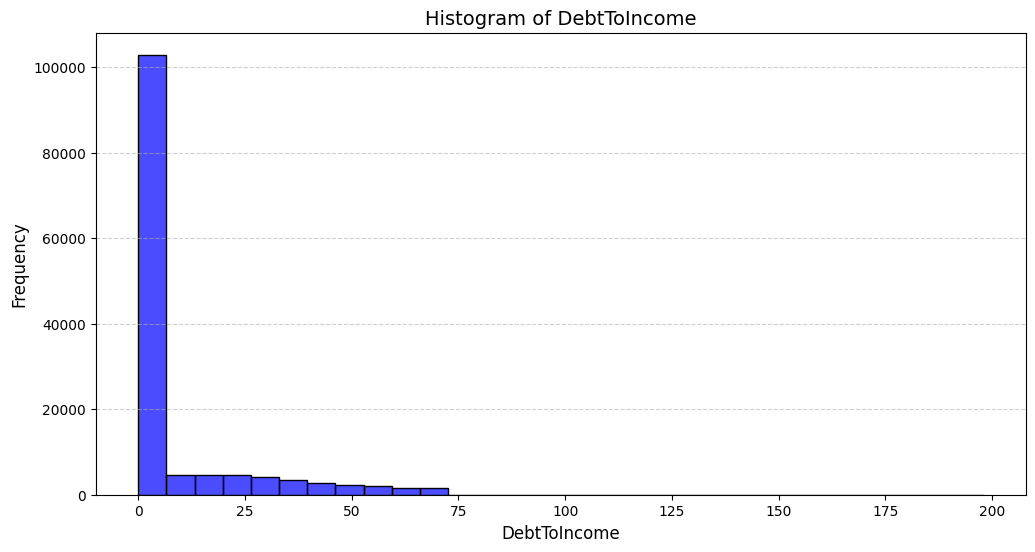

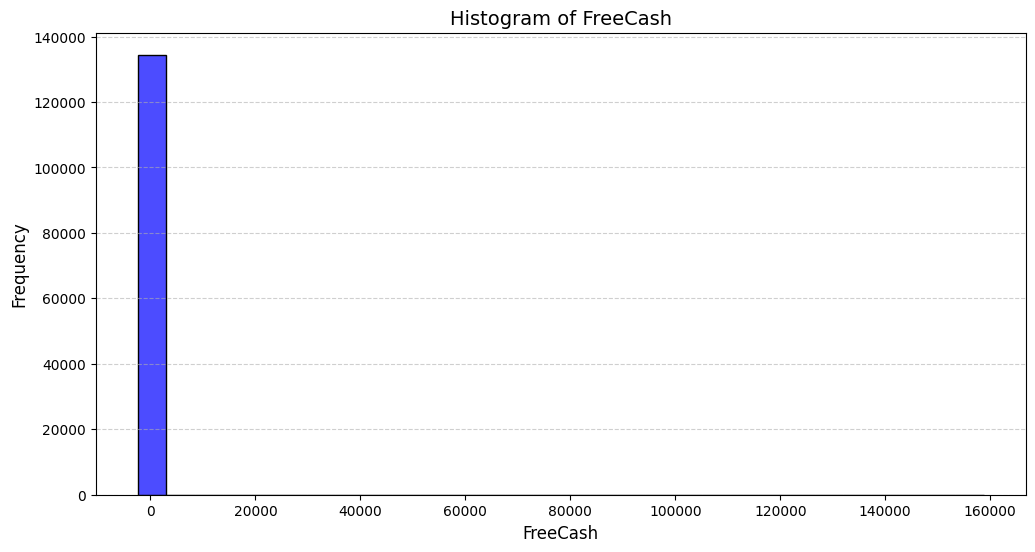

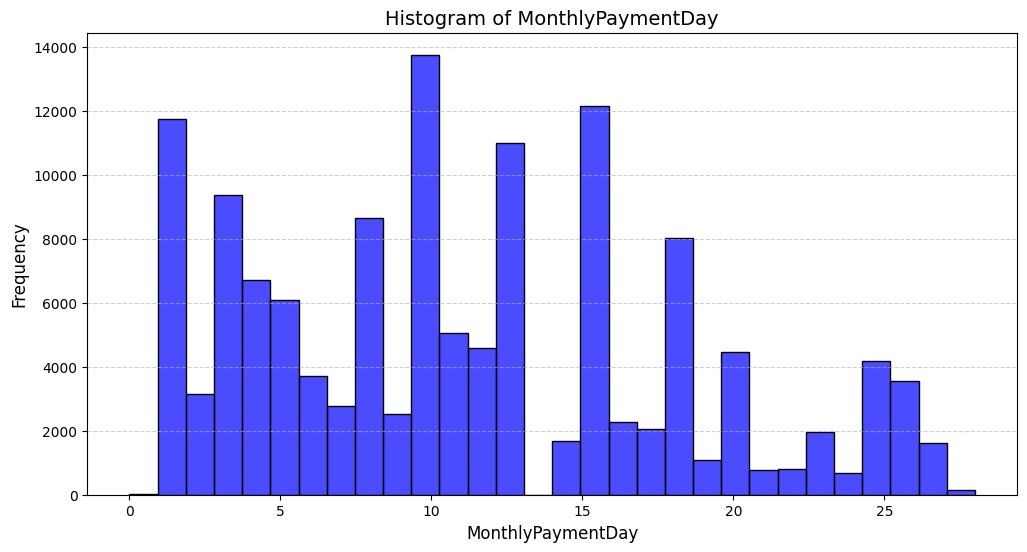

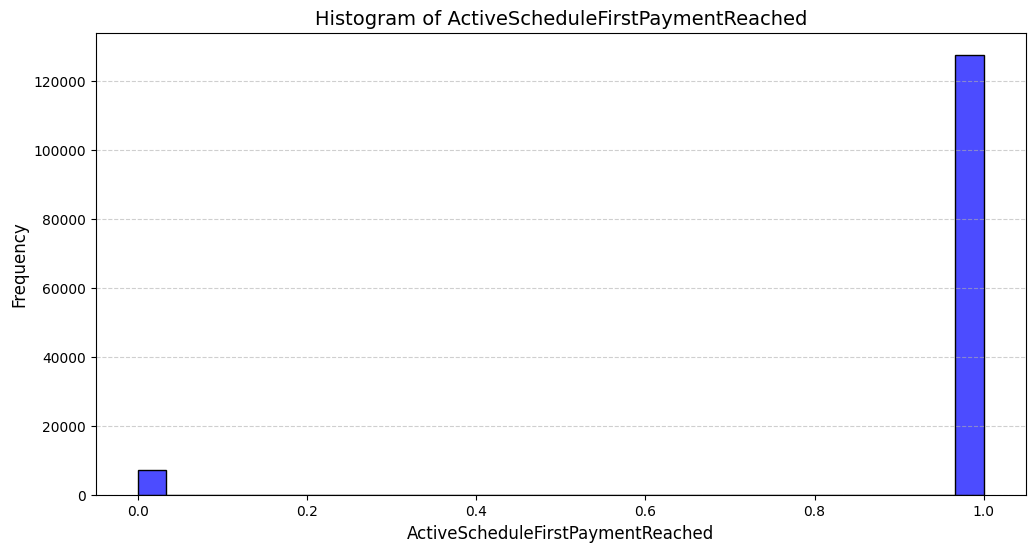

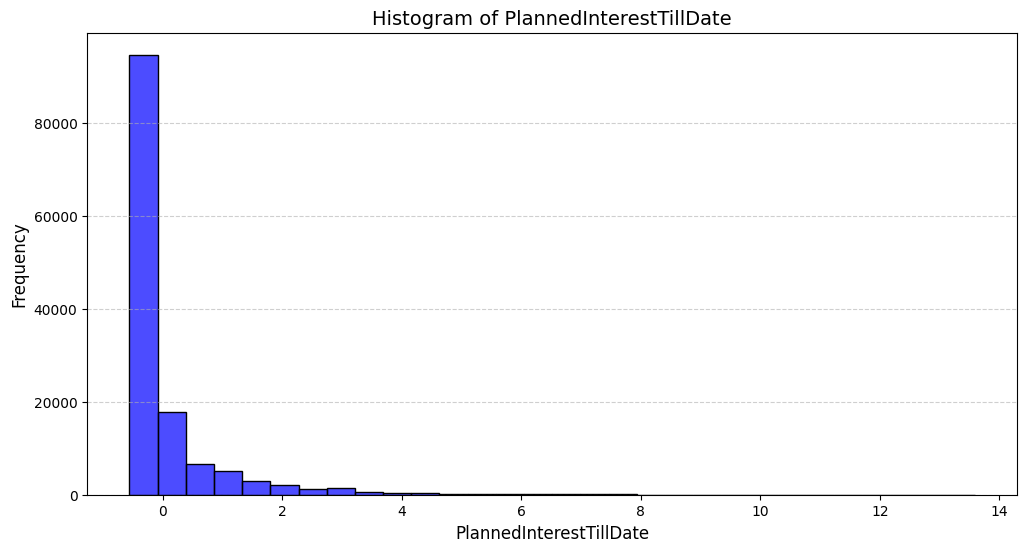

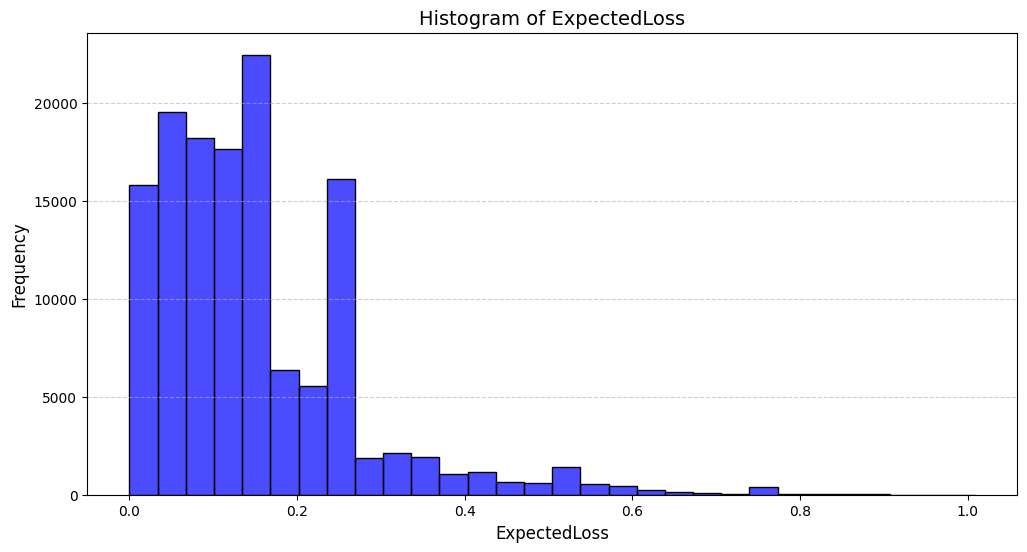

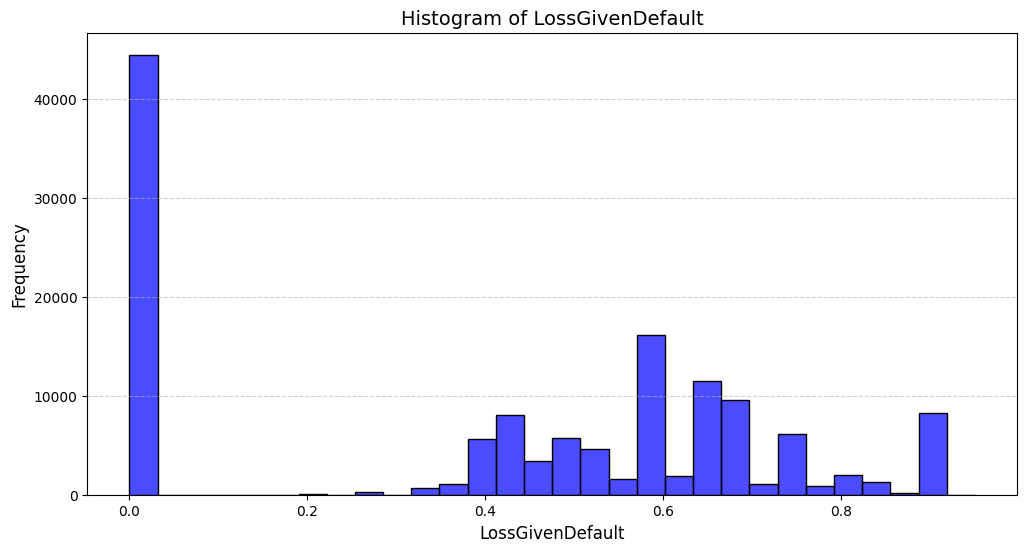

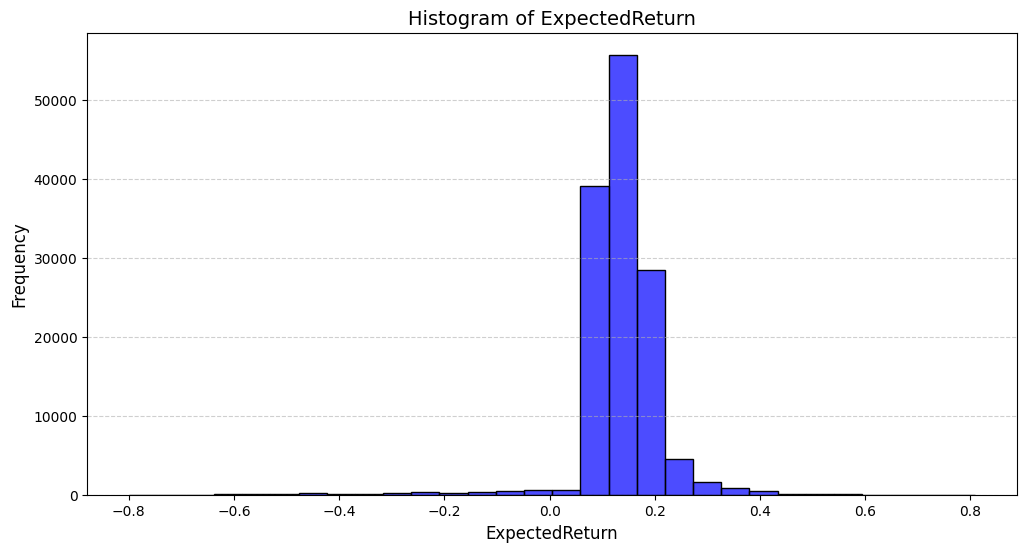

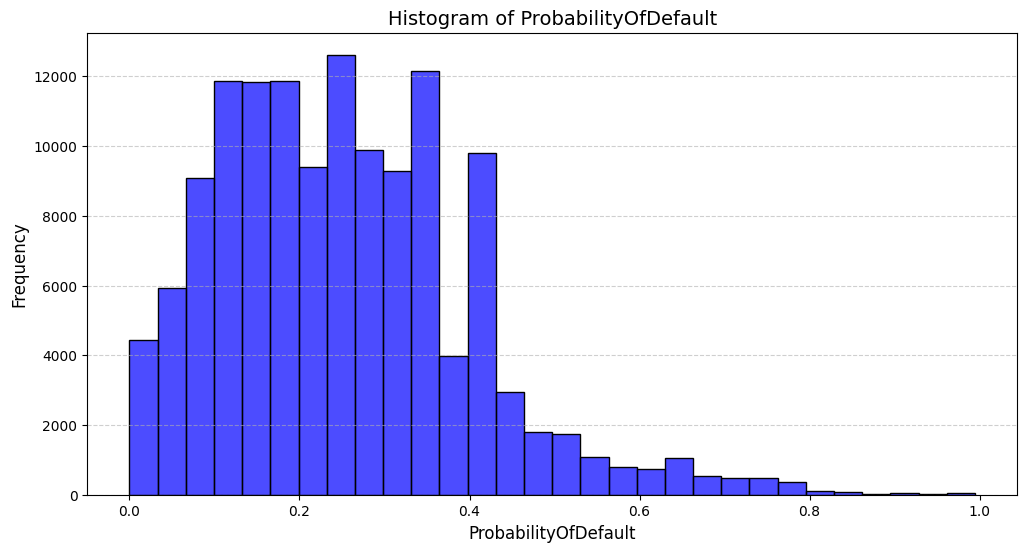

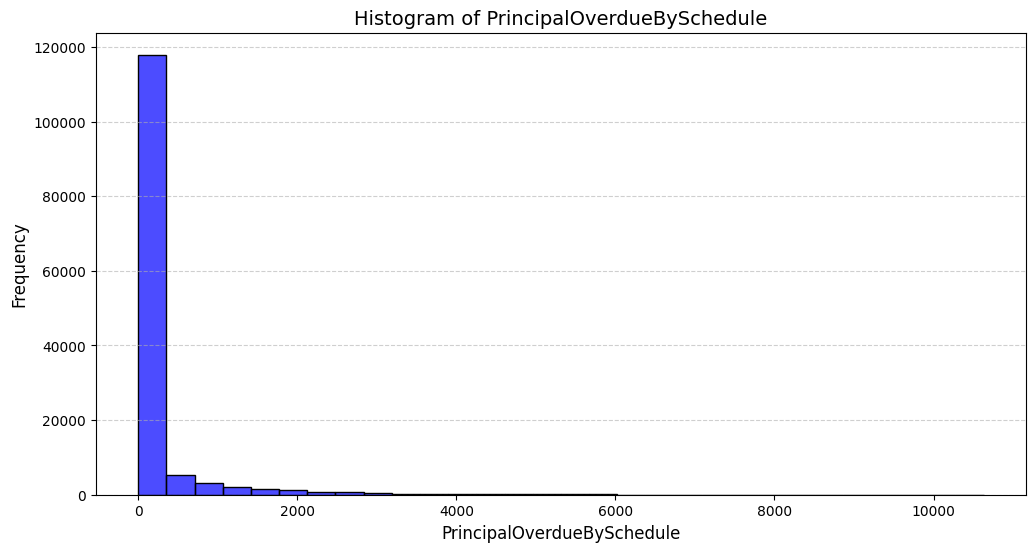

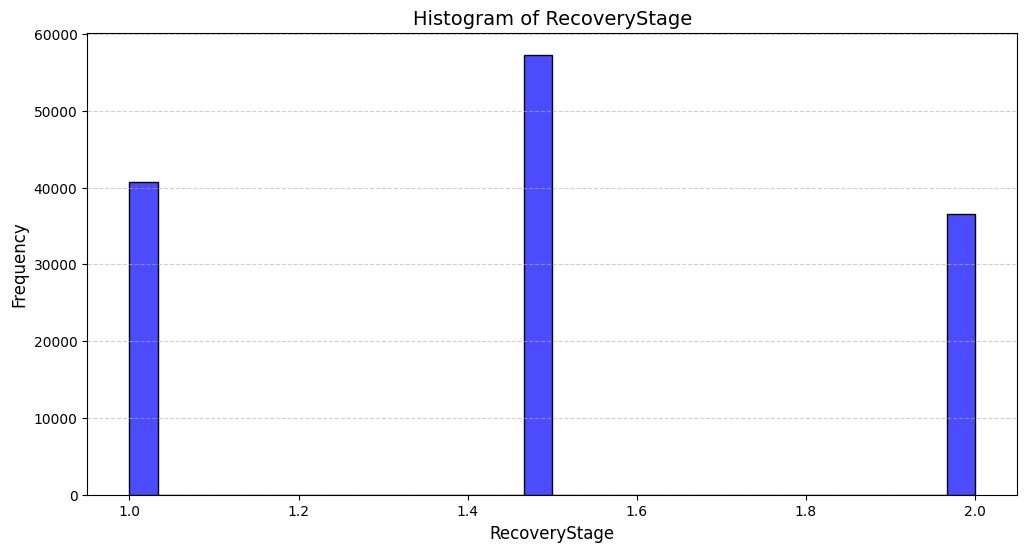

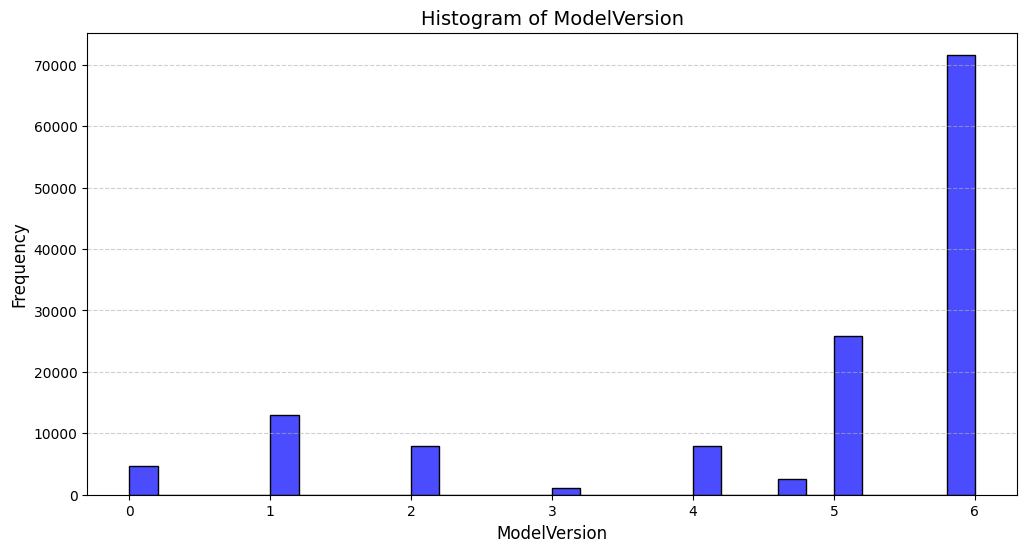

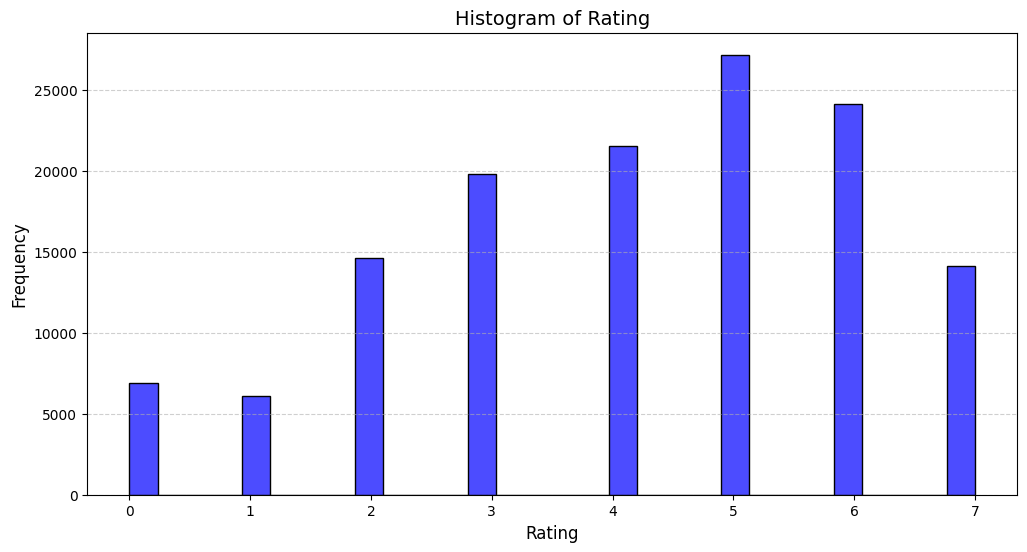

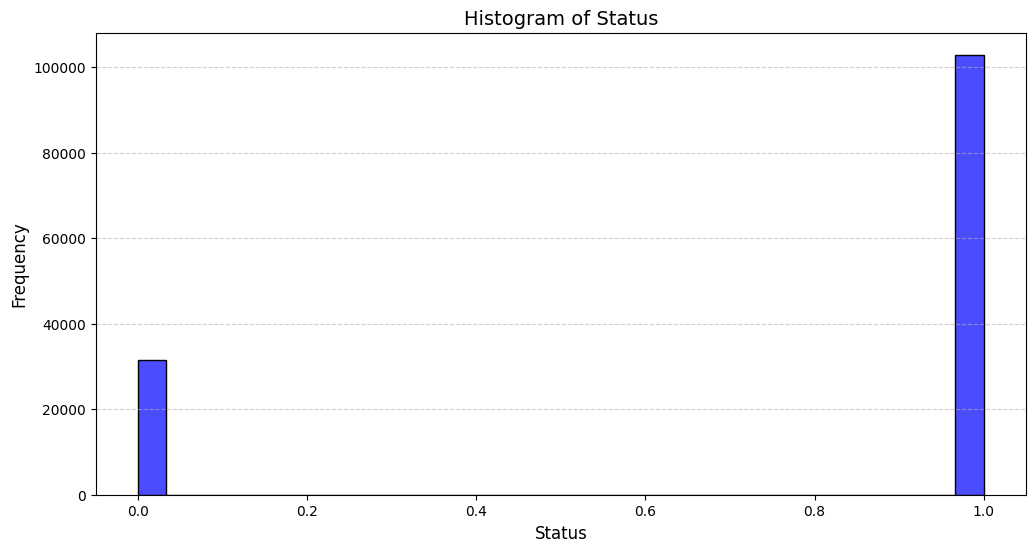

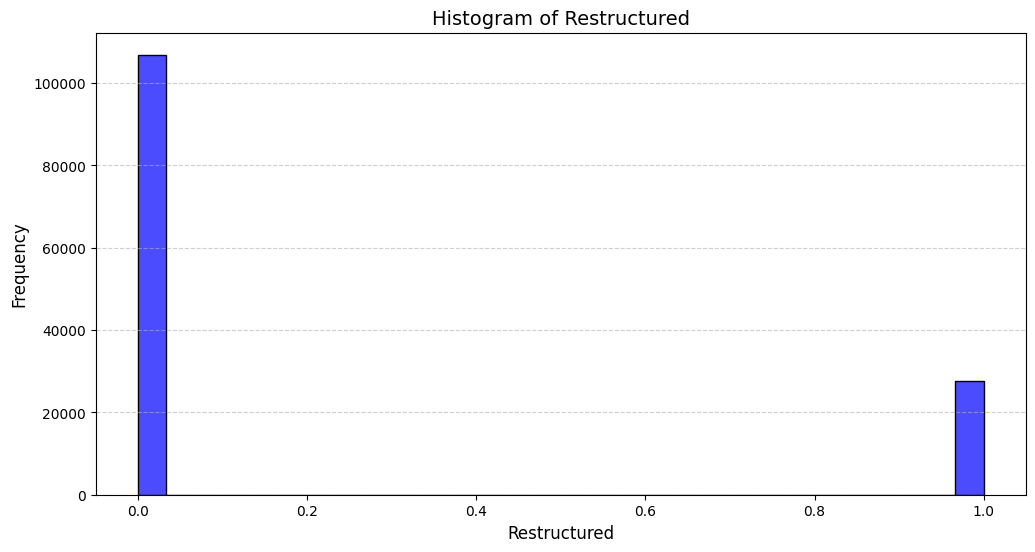

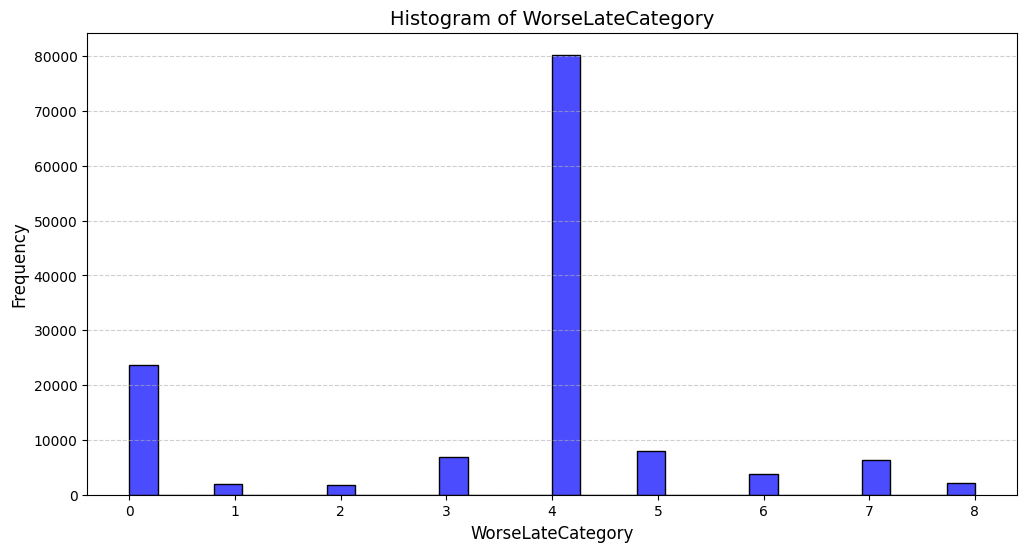

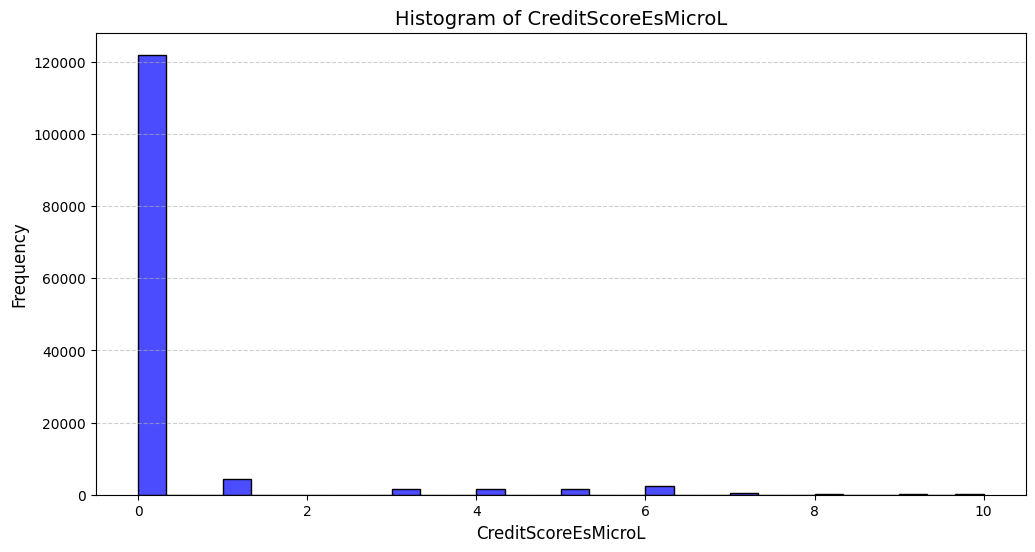

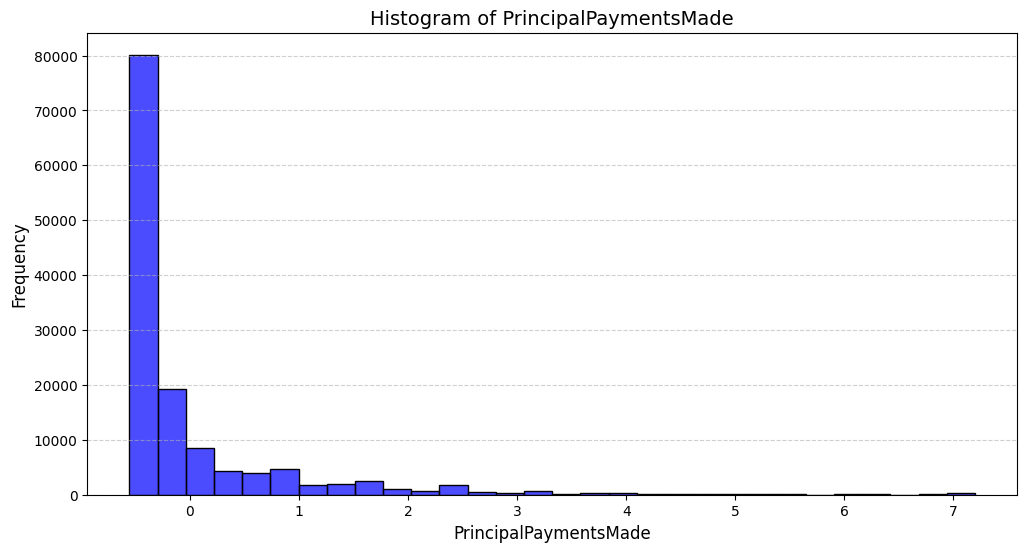

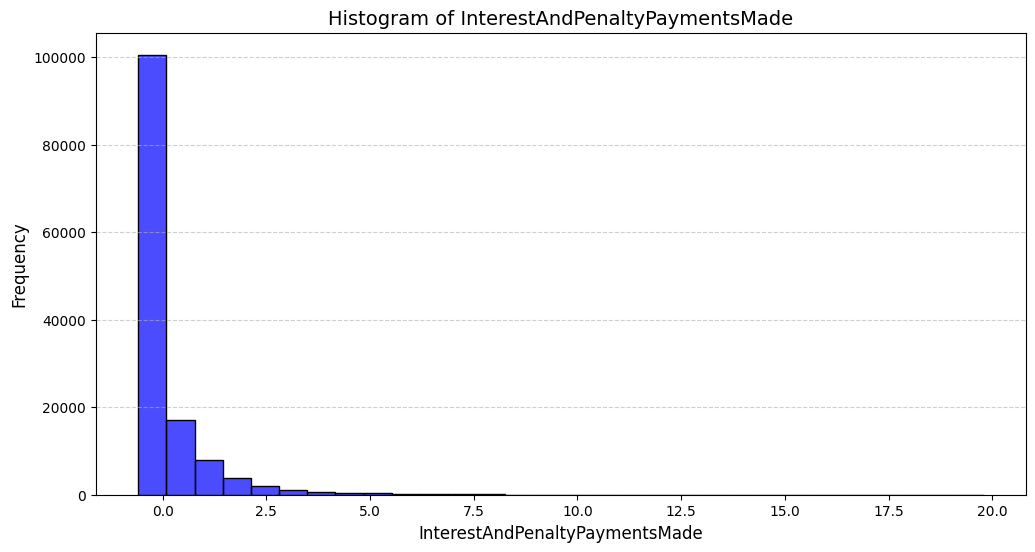

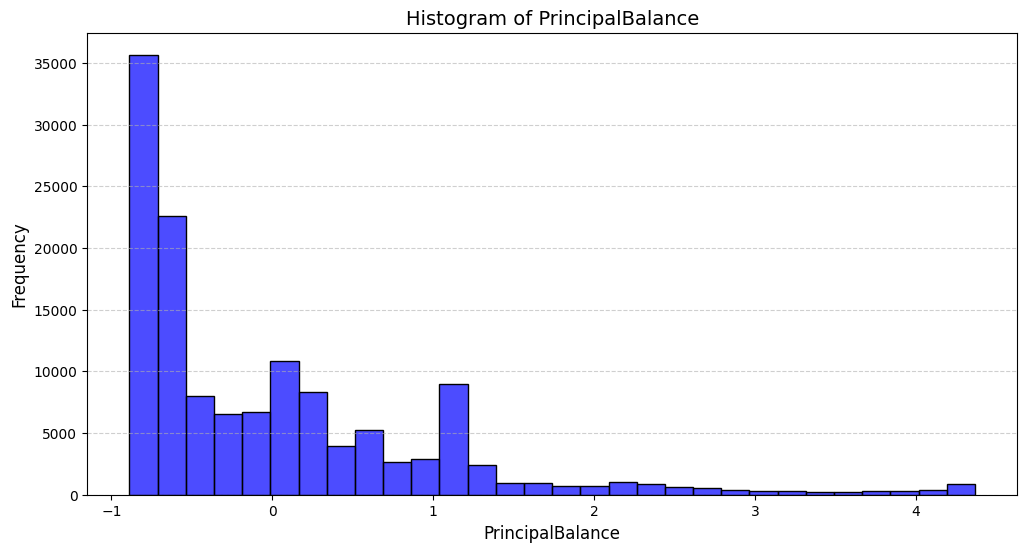

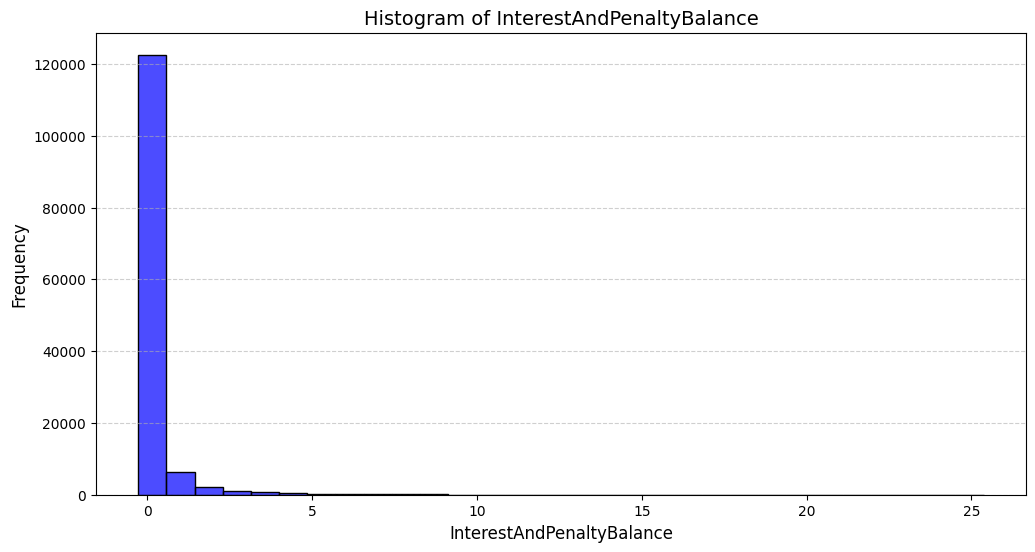

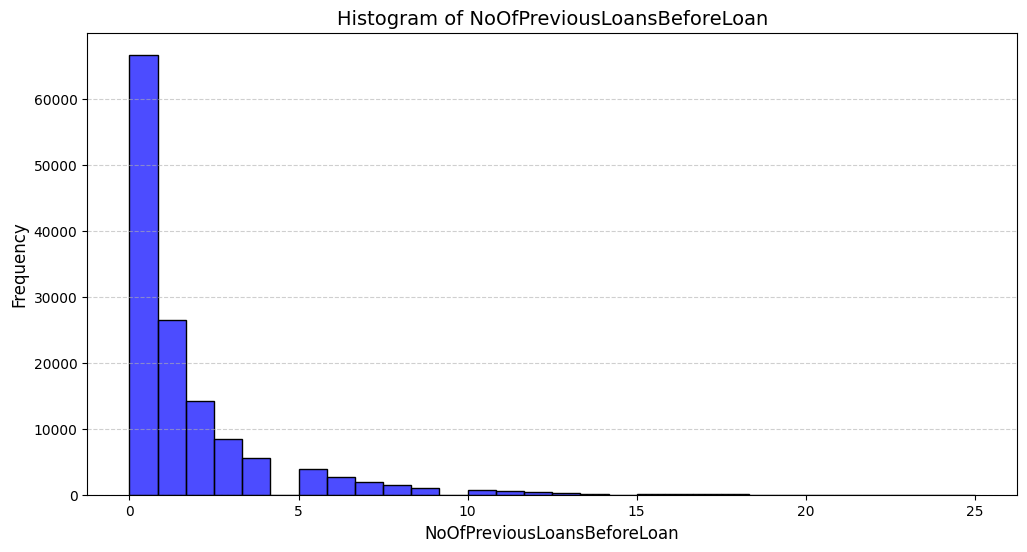

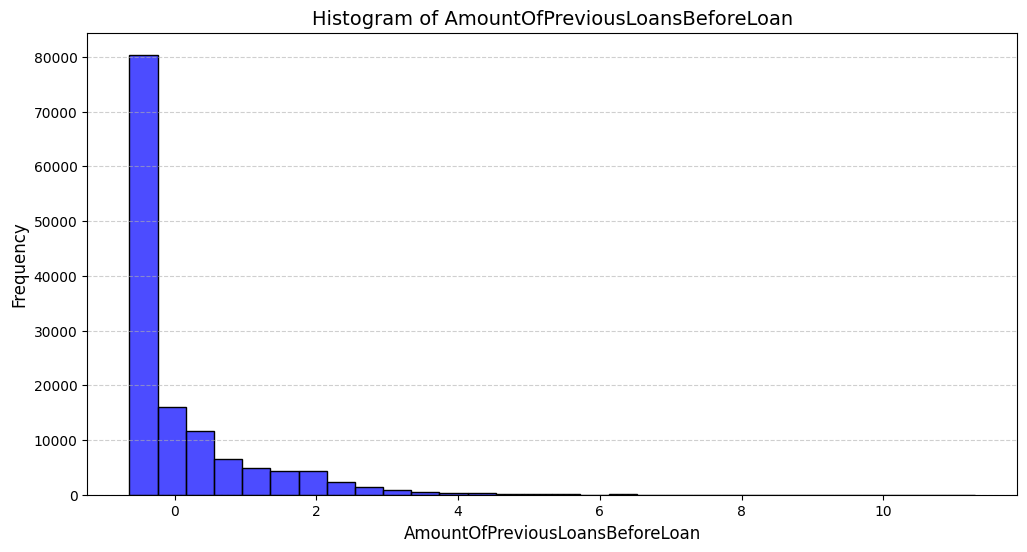

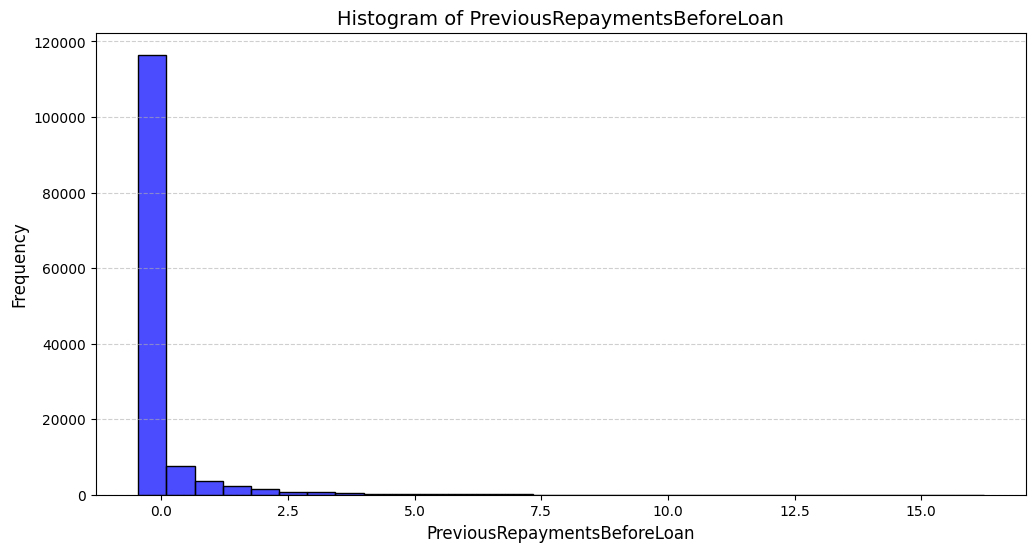

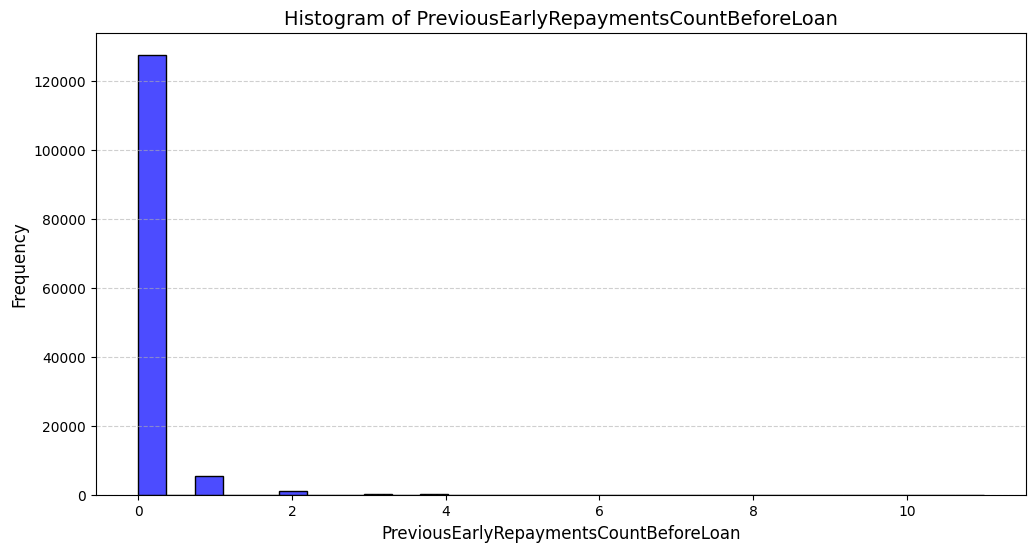

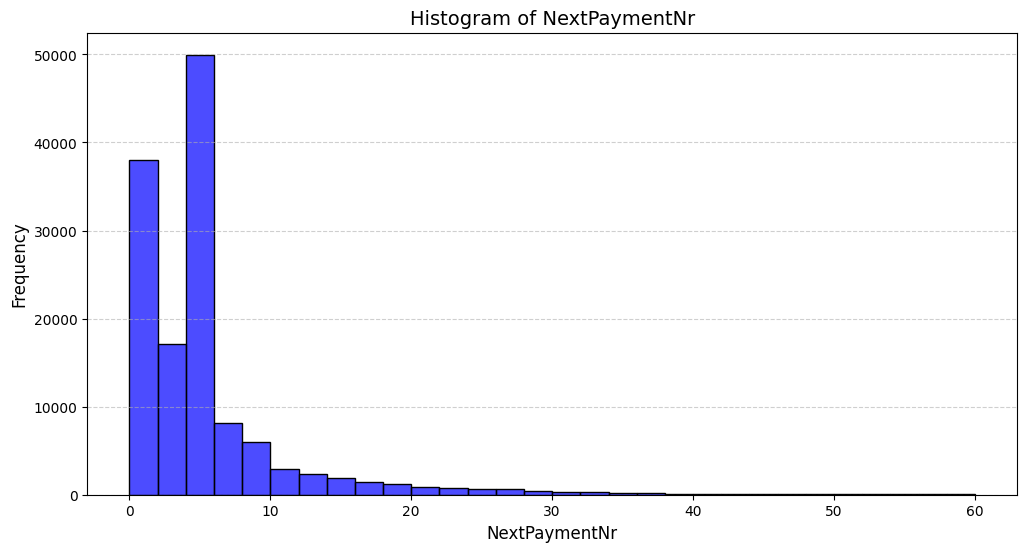

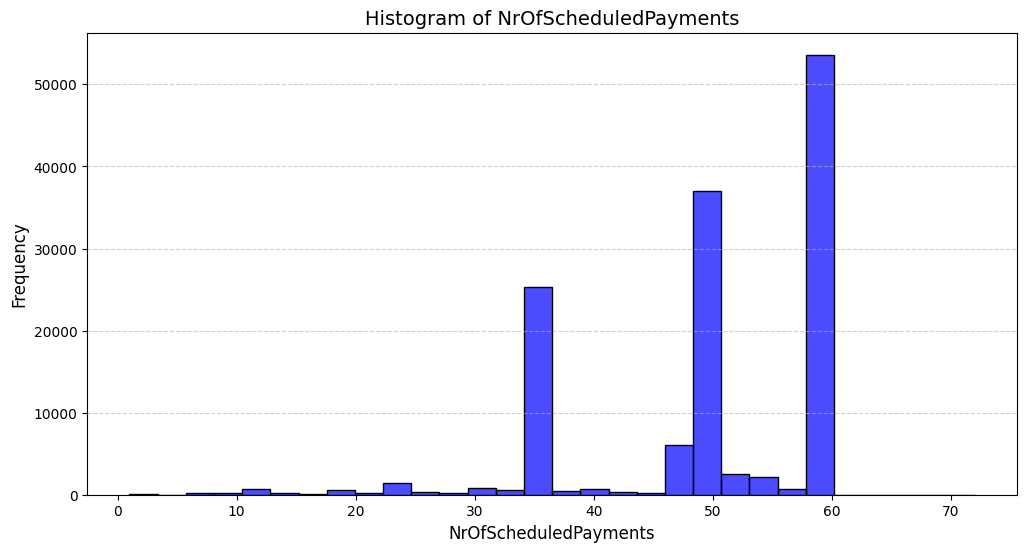

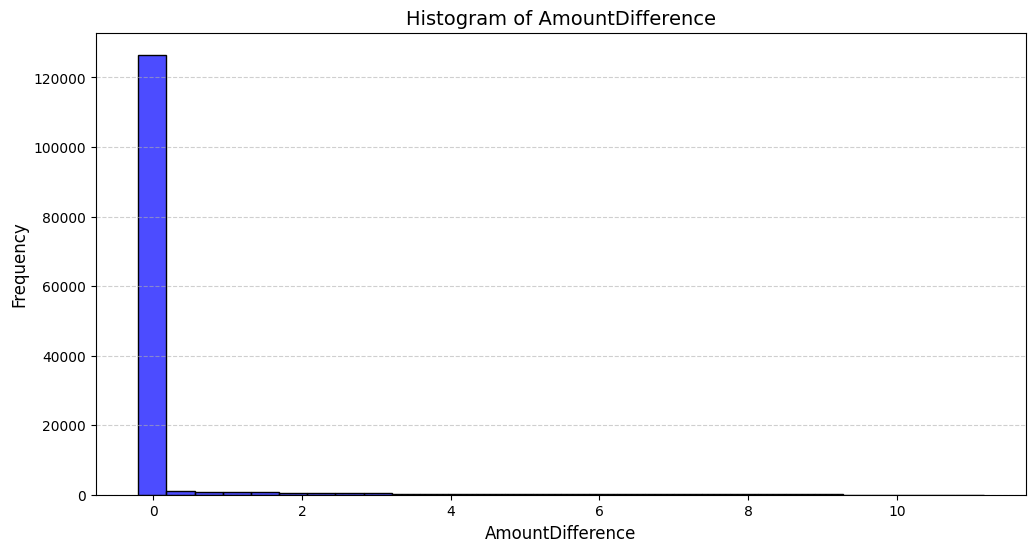

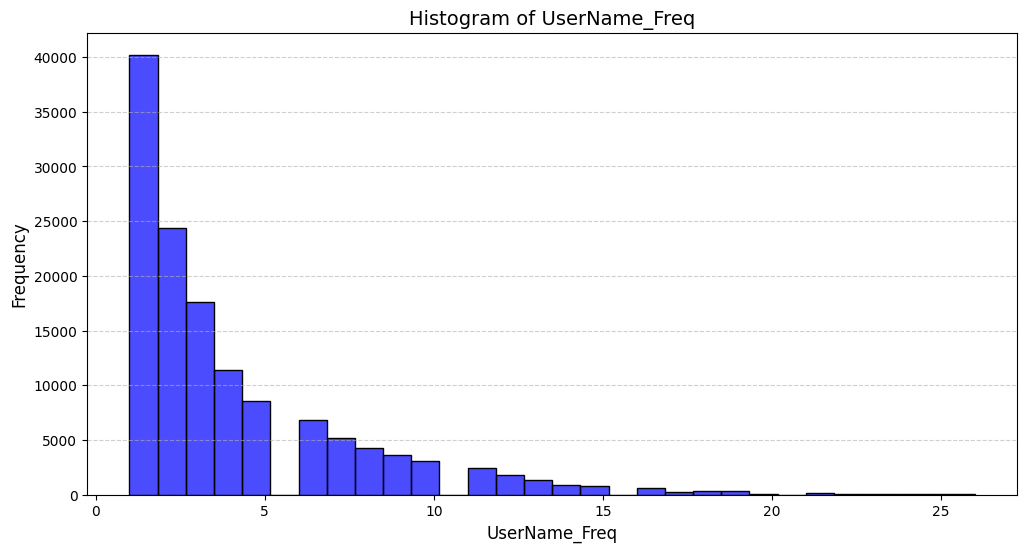

In [10]:
for col in numerical_features.columns:
    # Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(numerical_features[col], bins=30, kde=False, color='blue', alpha=0.7)
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()


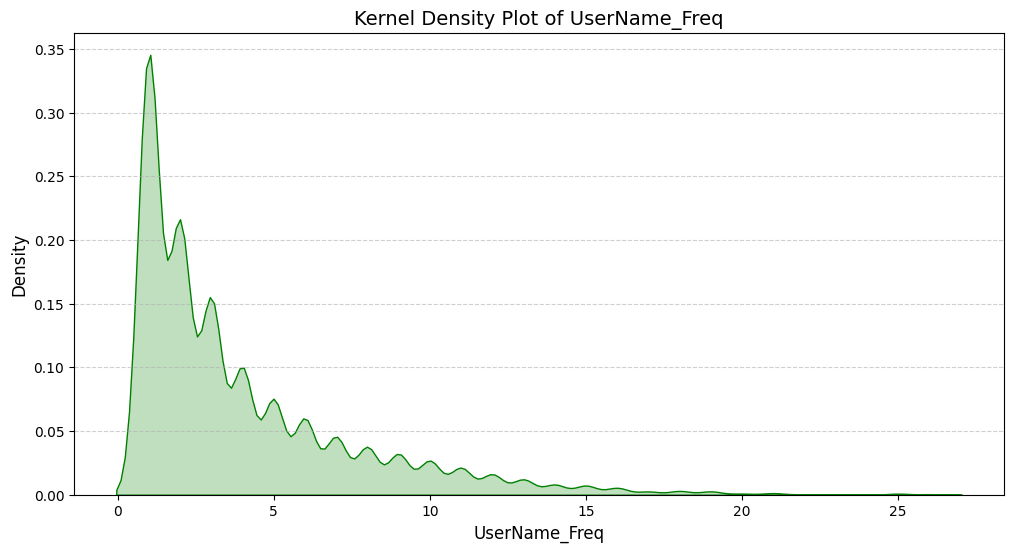

In [11]:
# Kernel Density Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(numerical_features[col], shade=True, color='green')
plt.title(f"Kernel Density Plot of {col}", fontsize=14)
plt.xlabel(col, fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [12]:
# --- Univariate Analysis for Categorical Features ---
categorical_features = dataset.select_dtypes(include=['object'])


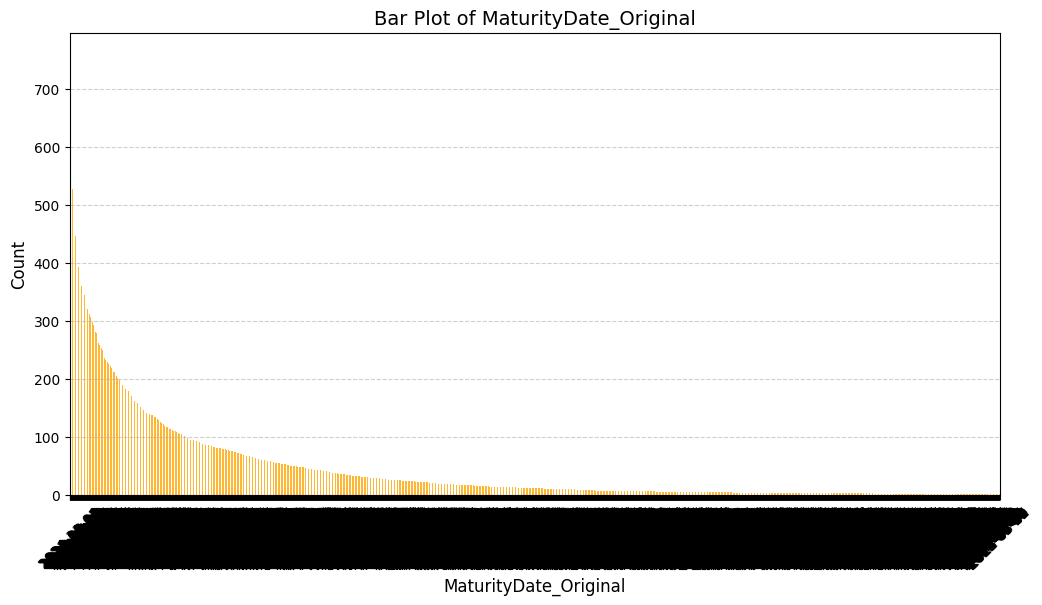

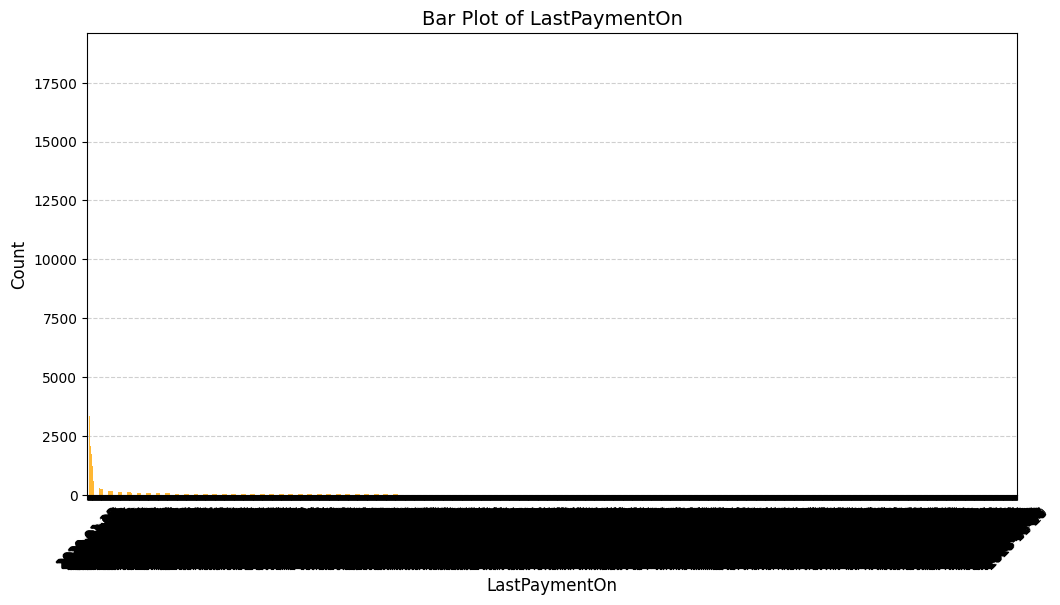

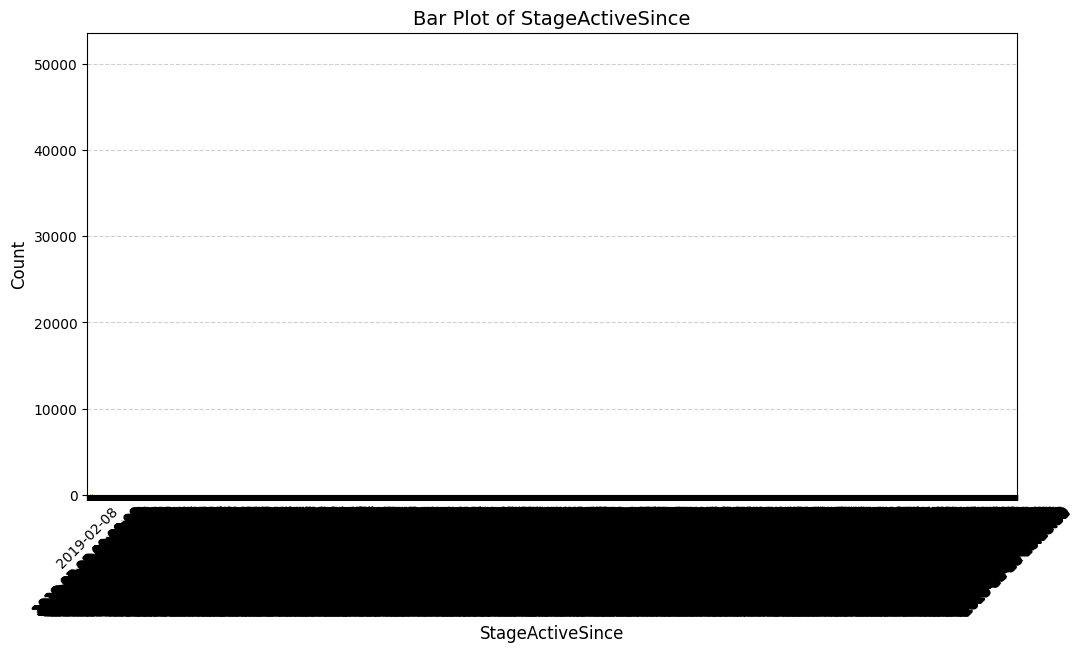

In [13]:
for col in categorical_features.columns:
    # Frequency Distribution (Bar Plot)
    plt.figure(figsize=(12, 6))
    dataset[col].value_counts().plot(kind='bar', color='orange', alpha=0.8)
    plt.title(f"Bar Plot of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.show()


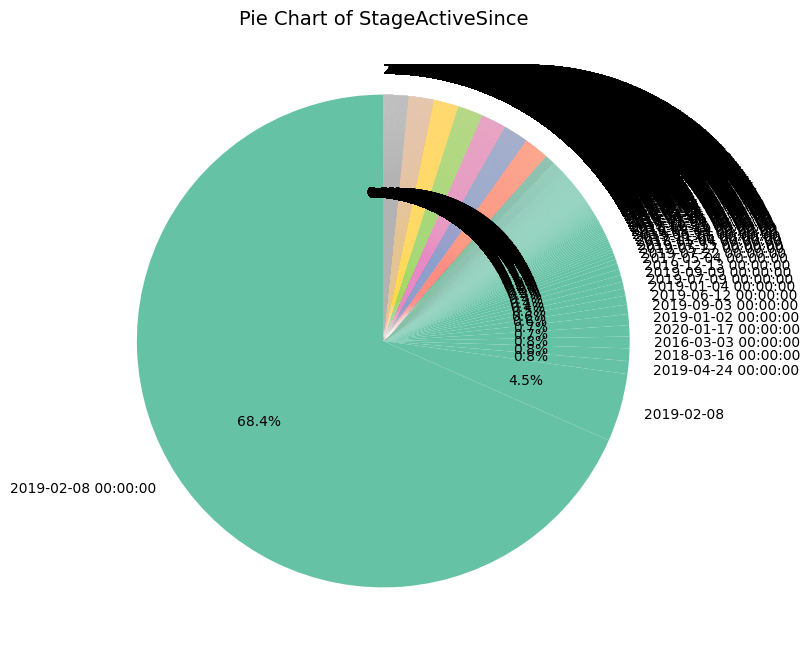

In [15]:
  # Pie Chart
plt.figure(figsize=(8, 8))
dataset[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title(f"Pie Chart of {col}", fontsize=14)
plt.ylabel("")  # Hide y-label for aesthetics
plt.show()

# Bivariate Data Analysis: #

In [19]:
# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['number'])

# Compute correlation matrices
correlation_matrix_pearson = numeric_data.corr(method='pearson')
correlation_matrix_spearman = numeric_data.corr(method='spearman')

print(correlation_matrix_pearson)
print(correlation_matrix_spearman)
dataset.head

                                        LoanNumber  BidsPortfolioManager  \
LoanNumber                                1.000000             -0.384473   
BidsPortfolioManager                     -0.384473              1.000000   
BidsApi                                  -0.048516              0.105199   
BidsManual                               -0.056821              0.057949   
NewCreditCustomer                        -0.028044              0.054073   
ApplicationSignedHour                    -0.056337              0.001363   
ApplicationSignedWeekday                  0.000144             -0.001389   
VerificationType                          0.068827              0.033208   
LanguageCode                              0.104642             -0.028838   
Age                                       0.109456             -0.008038   
Gender                                    0.153167             -0.025618   
Country                                   0.106854              0.037583   
Interest    

<bound method NDFrame.head of         LoanNumber  BidsPortfolioManager  BidsApi  BidsManual  \
0              659                     0        0   -0.592106   
1              654                     0        0   -0.558036   
2              641                     0        0   -0.319547   
3              668                     0        0   -0.668764   
4              652                     0        0   -0.319547   
...            ...                   ...      ...         ...   
134524      283484                  2515        0   -0.099063   
134525      285168                  1880        0    0.747200   
134526      281602                  1975        0   -0.045755   
134527      285431                  1840        0    0.800508   
134528      285630                  2990        0   -0.732094   

        NewCreditCustomer MaturityDate_Original  ApplicationSignedHour  \
0                       1            2010-06-25                     17   
1                       0            2009

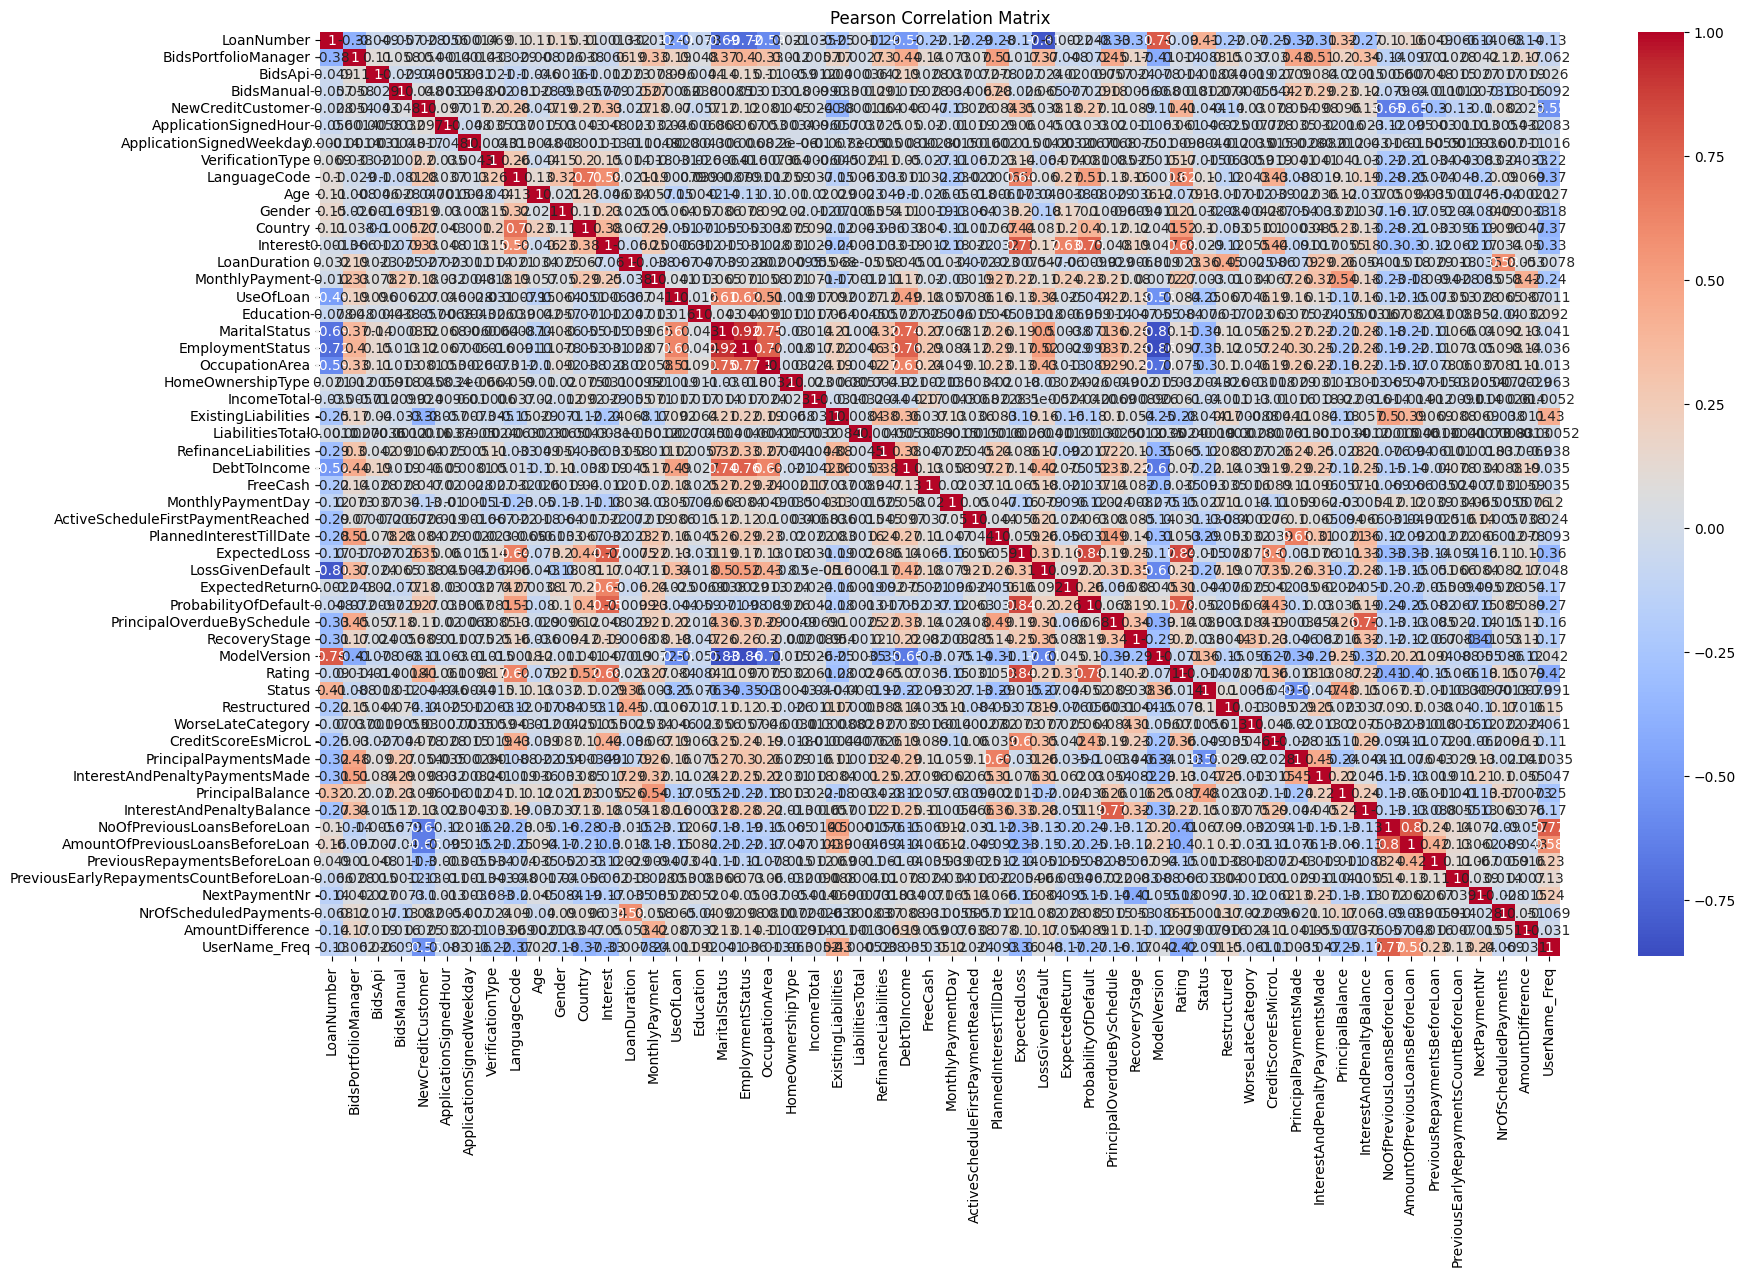

In [20]:
# Display heatmap (Seaborn)
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

In [26]:
print(dataset.columns)


Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'MaturityDate_Original', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'OccupationArea', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'RecoveryStage',
       'StageActiveSince', 'ModelVersion', 'Rating', 'Status', 'Restructured',
       'WorseLateCategory', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalanc

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Select a subset of numerical features for pair plots
numerical_features = ['AmountDifference', 'interest', 'loanduration', 'monthlypayment', 'incometotal', 'existingliabilities', 'debttoincome']


In [32]:
print("Available columns in dataset:", dataset.columns)
print("Requested numerical features:", numerical_features)


Available columns in dataset: Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'MaturityDate_Original', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'OccupationArea', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'RecoveryStage',
       'StageActiveSince', 'ModelVersion', 'Rating', 'Status', 'Restructured',
       'WorseLateCategory', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyP

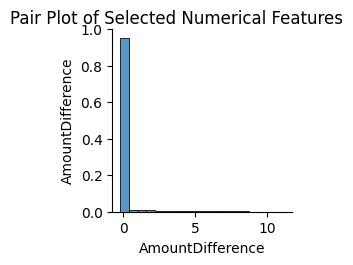

In [35]:
# Keep only numerical columns that exist in the dataset
numerical_features = [col for col in numerical_features if col in dataset.columns]

# Ensure we are not passing an empty list
if numerical_features:
    sns.pairplot(dataset[numerical_features])
    plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02)
    plt.show()
else:
    print("No valid numerical columns found in dataset.")


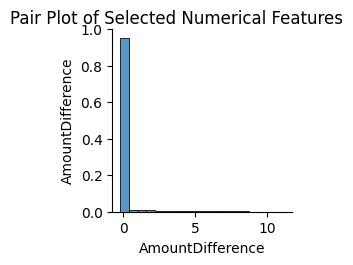

In [38]:
pearson_corr = dataset[numerical_features].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)


Pearson Correlation Matrix:
                  AmountDifference
AmountDifference               1.0


In [40]:
# Spearman correlation (monotonic relationships)
spearman_corr = dataset[numerical_features].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)


Spearman Correlation Matrix:
                  AmountDifference
AmountDifference               1.0


# Correlation Coefficients (Numerical vs. Numerical) #

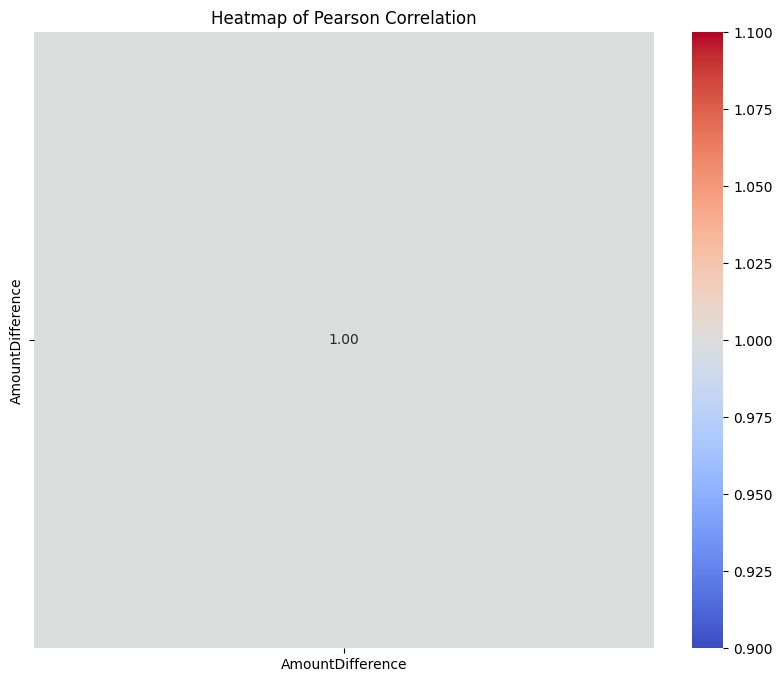

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Pearson Correlation")
plt.show()



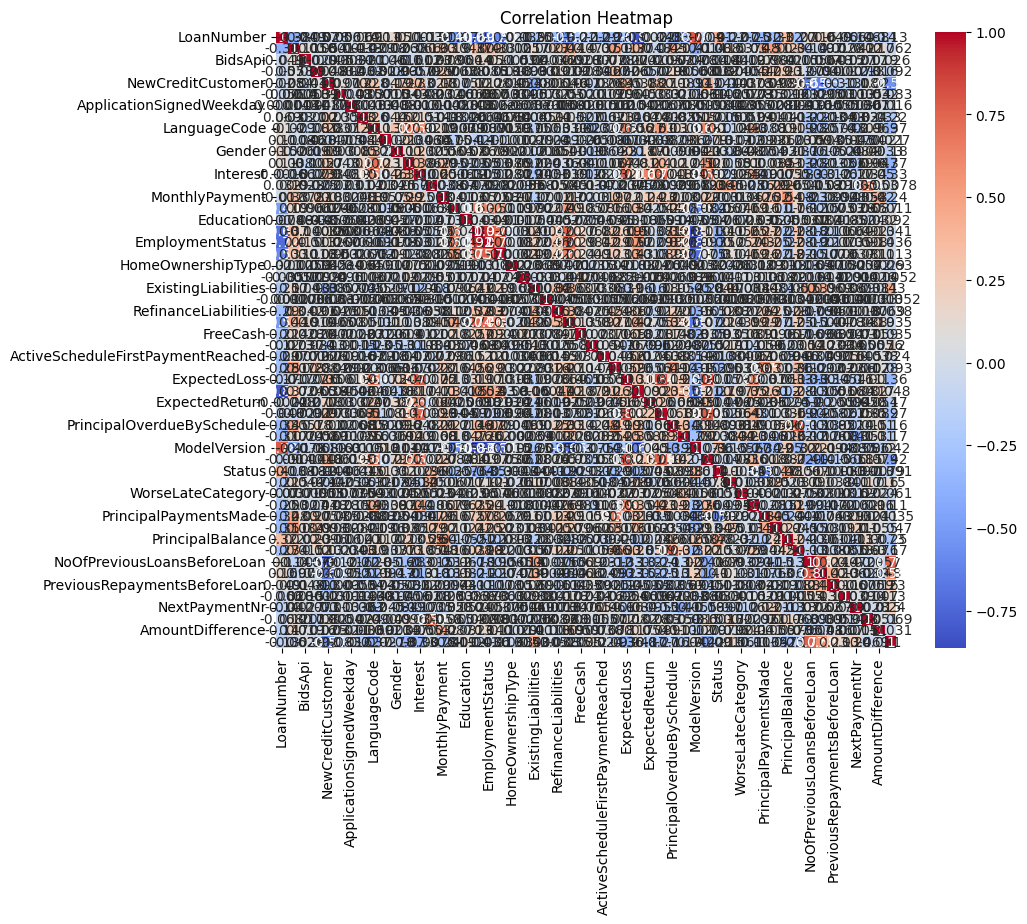

In [47]:
#Visualize Correlations: Use a heatmap for better understanding:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [58]:
categorical_feature = 'MaritalStatus'  # Replace with your column name
numerical_feature = 'AmountDifference'     

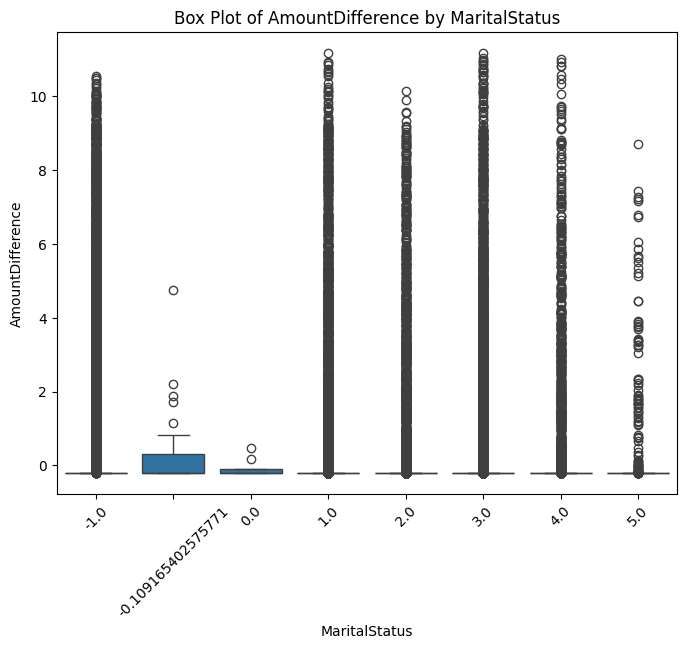

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_feature, y=numerical_feature, data=dataset)
plt.title(f"Box Plot of {numerical_feature} by {categorical_feature}")
plt.xticks(rotation=45)
plt.show()

In [55]:
# Check available columns in dataset
print(dataset.columns)


Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'MaturityDate_Original', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'OccupationArea', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'RecoveryStage',
       'StageActiveSince', 'ModelVersion', 'Rating', 'Status', 'Restructured',
       'WorseLateCategory', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalanc

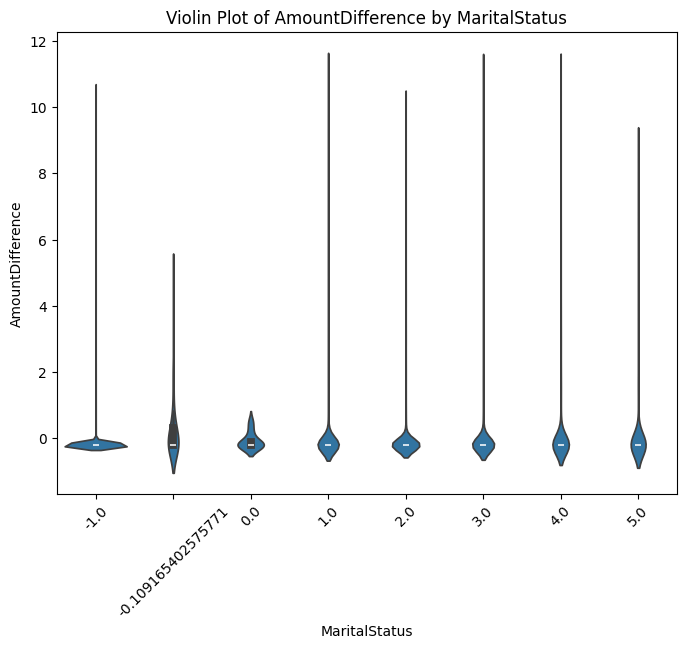

In [61]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=categorical_feature, y=numerical_feature, data=dataset)
plt.title(f"Violin Plot of {numerical_feature} by {categorical_feature}")
plt.xticks(rotation=45)
plt.show()

In [63]:
# Select only numerical features
numerical_df = dataset.select_dtypes(include=['float64', 'int64'])

# Check for missing values
print(numerical_df.isnull().sum())

# Handle missing values if necessary
numerical_df = numerical_df.dropna()  # or fill missing values, e.g., numerical_df.fillna(0)


LoanNumber                                0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
ApplicationSignedHour                     0
ApplicationSignedWeekday                  0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
OccupationArea                            0
HomeOwnershipType                         0
IncomeTotal                               0
ExistingLiabilities             

In [64]:
# Compute the correlation matrix
correlation_matrix = numerical_df.corr()


In [65]:
# Plot heatmap
plt.figure(figsize=(40,30))  # Adjust the figure size as needed



<Figure size 4000x3000 with 0 Axes>

<Figure size 4000x3000 with 0 Axes>

In [66]:
# Plot heatmap
plt.figure(figsize=(40,30))  # Adjust the figure size as needed



<Figure size 4000x3000 with 0 Axes>

<Figure size 4000x3000 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

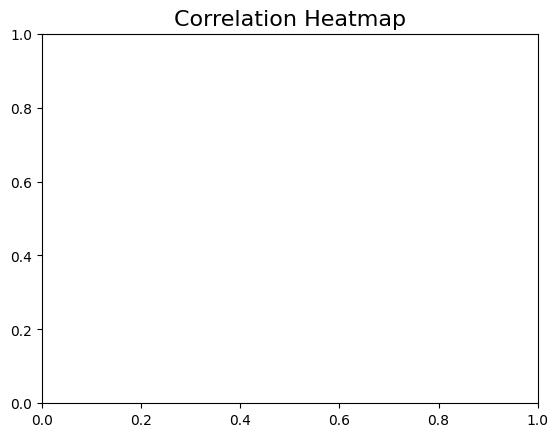

In [67]:
plt.title('Correlation Heatmap', fontsize=16)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

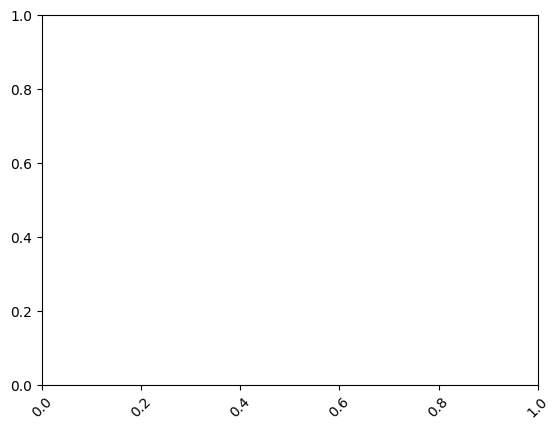

In [68]:
plt.xticks(rotation=45)


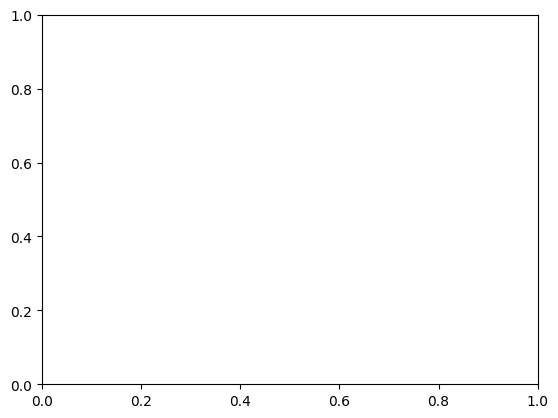

In [69]:
plt.yticks(rotation=0)
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler
# Select only numerical features
numerical_df = dataset.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# Check the shape of the scaled data
print("Shape of scaled data:", scaled_data.shape)

Shape of scaled data: (134529, 54)


In [72]:
scaled_data = scaled_data[~np.isnan(scaled_data).any(axis=1)]


In [73]:
scaled_data = scaled_data[~np.isnan(scaled_data).any(axis=1)]


In [74]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

In [76]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [77]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Cumulative Explained Variance by Number of Principal Components')

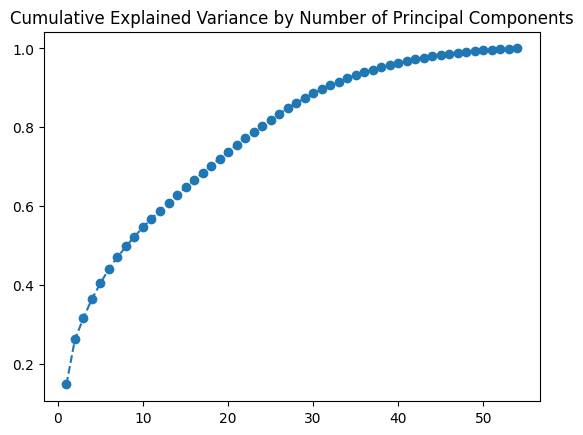

In [78]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')


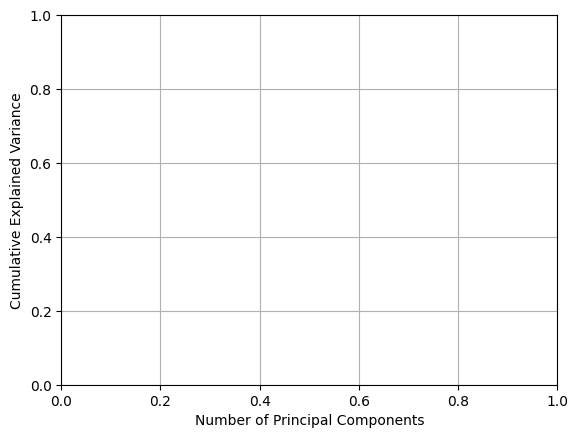

In [79]:
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)


In [80]:
plt.show()


In [81]:
from mpl_toolkits.mplot3d import Axes3D

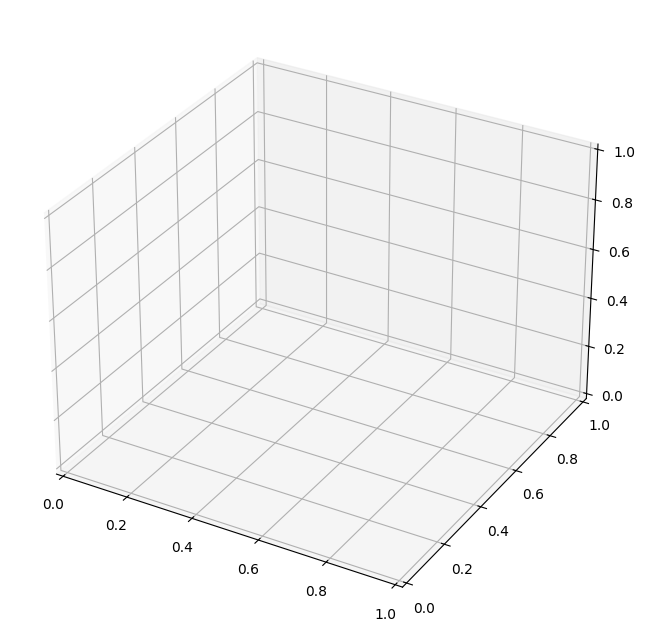

In [82]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

In [93]:
# Sample the data to reduce size (e.g., take 1000 random rows)
df_sample = dataset.sample(n=1000, random_state=42)
# Handling missing values by filling them with the mean of the column
feature1 = dataset['AmountDifference'].fillna(dataset['AmountDifference'].mean())
feature2 = dataset['Interest'].fillna(dataset['Interest'].mean())
feature3 = dataset['MonthlyPayment'].fillna(dataset['MonthlyPayment'].mean())


In [94]:
ax.scatter(feature1, feature2, feature3, c='b', marker='o')


In [88]:
dataset.columns

Index(['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'MaturityDate_Original', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'OccupationArea', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'RecoveryStage',
       'StageActiveSince', 'ModelVersion', 'Rating', 'Status', 'Restructured',
       'WorseLateCategory', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalanc

In [95]:
# Set labels and title
ax.set_xlabel('AppliedAmount')
ax.set_ylabel('Interest')
ax.set_zlabel('MonthlyPayment')
ax.set_title('3D Scatter Plot of AppliedAmount, Interest, and MonthlyPayment')
# Display the plot
plt.show()

In [103]:
from pandas.plotting import parallel_coordinates
# Let's create a DataFrame with relevant features for the plot
df_plot = dataset[['AmountDifference', 'Interest', 'MonthlyPayment']].fillna(dataset.mean())  # Handle missing values<Axes: >

TypeError: can only concatenate str (not "int") to str

In [104]:
# Handle non-numeric columns (e.g., by dropping them or converting to a numeric representation)
dataset['AmountDifference'] = pd.to_numeric(dataset['AmountDifference'], errors='coerce')  # Convert to numeric (invalid values will be NaN)
dataset['Interest'] = pd.to_numeric(dataset['Interest'], errors='coerce')
dataset['MonthlyPayment'] = pd.to_numeric(dataset['MonthlyPayment'], errors='coerce')

# Now calculate the mean for numeric columns
df_plot = dataset[['AmountDifference', 'Interest', 'MonthlyPayment']].fillna(dataset[['AmountDifference', 'Interest', 'MonthlyPayment']].mean())


In [ ]:
plt.figure(figsize=(12, 6),dpi=100)
parallel_coordinates(df_plot, class_column='MonthlyPayment', color=plt.cm.viridis(np.linspace(0, 1, len(df_plot))))

<Axes: >

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[['AppliedAmount', 'Interest', 'MonthlyPayment']])
df_normalized = pd.DataFrame(normalized_data, columns=['AppliedAmount', 'Interest', 'MonthlyPayment'])

# Use normalized data for plotting
plt.figure(figsize=(12, 6))
parallel_coordinates(df_normalized, class_column='MonthlyPayment', color=plt.cm.viridis(np.linspace(0, 1, len(df_normalized))))



In [ ]:
plt.title('Parallel Coordinates Plot of AppliedAmount, Interest, and MonthlyPayment')
plt.xlabel('Features')
plt.ylabel('Feature Value')
plt.show()